This notebook is used for the purposes of conducting item-level visualisations of yearly PAT data.
Here, we will:
1. Match questions from each test to their 'strands', type of test (e.. PAT Maths or PAT Reading). 
2. Calculate the school's average performance for the test and compare to the individual student performance
3. Generate individual pdf reports of all students within a class for the class teachers.
    * Ideally, this should contain a table with the student's performance and a box plot showing where they fall within the school cohort

## Setup

In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from adjustText import adjust_text
import contextlib
import warnings

In [2]:
# # Check current working directory
# import os
# os.getcwd()

In [3]:
# Reading dataframes
# Main PAT Maths results dataframe
data_maths_y7 = pd.read_excel("PAT_ReportGen_Files/PAT_Maths_Year7.xlsx")
data_maths_y8 = pd.read_excel("PAT_ReportGen_Files/PAT_Maths_Year8.xlsx")
data_maths_y9 = pd.read_excel("PAT_ReportGen_Files/PAT_Maths_Year9.xlsx")
data_maths_y10 = pd.read_excel("PAT_ReportGen_Files/PAT_Maths_Year10.xlsx")

# PAT Reading results
data_reading_y7 = pd.read_excel("PAT_ReportGen_Files/PAT_Reading_Year7.xlsx")
data_reading_y8 = pd.read_excel("PAT_ReportGen_Files/PAT_Reading_Year8.xlsx")
data_reading_y9 = pd.read_excel("PAT_ReportGen_Files/PAT_Reading_Year9.xlsx")
data_reading_y10 = pd.read_excel("PAT_ReportGen_Files/PAT_Reading_Year10.xlsx")

In [4]:
# Master list of students (please update this yearly)
class_list = pd.read_csv("2025_StudentClassList.csv") #2025 class list as an example

# List of students and their grades
student_CG = pd.read_csv("Student_CG.csv")

In [5]:
# Question substrands (also update yearly and for different year levels)
# maths_substrands_y7 = pd.read_csv("PAT_ReportGen_Files/PAT_Maths_Year7_Substrands.csv")
# maths_substrands_y8 = pd.read_csv("PAT_ReportGen_Files/PAT_Maths_Year8_Substrands.csv")
# maths_substrands_y9 = pd.read_csv("PAT_ReportGen_Files/PAT_Maths_Year9_Substrands.csv")
maths_substrands_y10 = pd.read_csv("PAT_Maths_Year10_Substrands.csv")

## Cleaning and Formatting

In [6]:
# # Trying function to clean
# def clean_question_strands(dataframe, q_end_col, res_df_name):
#     res_df_name = dataframe.iloc[2:6,np.r_[0,13:q_end_col_maths]]


In [7]:
# # Setting variables for cleaning and formatting
# # Question rows - give index of rows and columns
# # q_start_row = 2
# # q_end_row = 6
# #q_start_col = 13 
# q_end_col_maths = 53
# q_end_col_reading = 48

# # Apply
# # Creating two dataframes
# # Maths
# q_strands_maths = data_maths.iloc[2:6,np.r_[0,13:q_end_col_maths]]
# students_maths = data_maths.drop(data_maths.index[0:10])

# # Reading
# q_strands_reading = data_reading.iloc[2:6,np.r_[0,13:q_end_col_reading]]
# students_reading = data_reading.drop(data_reading.index[0:10])

In [8]:
# Making initial dataframes
# Maths question strands
q_strands_maths_y7 = data_maths_y7.iloc[2:6,np.r_[0,13:53]]
q_strands_maths_y8 = data_maths_y8.iloc[2:6,np.r_[0,13:53]]
q_strands_maths_y9 = data_maths_y9.iloc[2:6,np.r_[0,13:53]]
q_strands_maths_y10 = data_maths_y10.iloc[2:6,np.r_[0,13:53]]

# Maths dataframe
students_maths_y7 = data_maths_y7.drop(data_maths_y7.index[0:10])
students_maths_y8 = data_maths_y8.drop(data_maths_y8.index[0:10])
students_maths_y9 = data_maths_y9.drop(data_maths_y9.index[0:10])
students_maths_y10 = data_maths_y10.drop(data_maths_y10.index[0:10])

# Reading question strands
q_strands_reading_y7 = data_reading_y7.iloc[2:6,np.r_[0,13:48]]
q_strands_reading_y8 = data_reading_y8.iloc[2:6,np.r_[0,13:47]]
q_strands_reading_y9 = data_reading_y9.iloc[2:6,np.r_[0,13:48]]
q_strands_reading_y10 = data_reading_y10.iloc[2:6,np.r_[0,13:48]]

# Reading dataframe
students_reading_y7 = data_reading_y7.drop(data_reading_y7.index[0:10])
students_reading_y8 = data_reading_y8.drop(data_reading_y8.index[0:10])
students_reading_y9 = data_reading_y9.drop(data_reading_y9.index[0:10])
students_reading_y10 = data_reading_y10.drop(data_reading_y10.index[0:10])


In [9]:
# # Strand variables
# strand_end_row_maths = 8
# strand_end_row_reading = 6
# strand_start_col_maths = 54
# strand_end_col_maths = 56
# strand_start_col_reading = 49
# strand_end_col_reading = 51

# # Make small dataframe of strands
# # Maths
# strand_key_maths = data_maths.iloc[2:strand_end_row_maths,np.r_[strand_start_col_maths:strand_end_col_maths]]
# # Reading
# strand_key_reading = data_reading.iloc[2:strand_end_row_reading,np.r_[strand_start_col_reading:strand_end_col_reading]]

In [10]:
# Forming strand dataframes
# Maths
strand_key_maths_y7 = data_maths_y7.iloc[2:8,np.r_[54:56]]
strand_key_maths_y8 = data_maths_y8.iloc[2:8,np.r_[54:56]]
strand_key_maths_y9 = data_maths_y9.iloc[2:8,np.r_[54:56]]
strand_key_maths_y10 = data_maths_y10.iloc[2:8,np.r_[54:56]]

# Reading
strand_key_reading_y7 = data_reading_y7.iloc[2:6,np.r_[49:51]]
strand_key_reading_y8 = data_reading_y8.iloc[2:6,np.r_[48:50]]
strand_key_reading_y9 = data_reading_y9.iloc[2:6,np.r_[49:51]]
strand_key_reading_y10 = data_reading_y10.iloc[2:6,np.r_[49:51]]

In [11]:
# # Make small dataframe of strands
# # Maths
# strand_key_maths = data_maths.iloc[2:8,np.r_[54:56]]
# # Reading
# strand_key_reading = data_reading.iloc[2:6,np.r_[49:51]]

### Student Dataframe

In [12]:
# # Assigning variables
# student_q_col_end_maths = 53
# student_q_col_end_reading = 48
# q_strands_maths_endcol = 41
# q_strands_reading_endcol = 36

# # Resetting question columns
# # Maths
# students_maths.iloc[0,13:student_q_col_end_maths] = q_strands_maths.iloc[3,1:q_strands_maths_endcol] # setting to question number
# # Changing column names of student dataset
# students_maths.columns = students_maths.iloc[0] # getting first row
# students_maths.drop(students_maths.index[0], inplace=True) # dropping first row
# students_maths.reset_index(drop = True, inplace=True)

# # Reading
# students_reading.iloc[0,13:student_q_col_end_reading] = q_strands_reading.iloc[3,1:q_strands_reading_endcol]
# # Changing column names
# students_reading.columns = students_reading.iloc[0] # getting first row
# students_reading.drop(students_reading.index[0], inplace=True) # dropping first row
# students_reading.reset_index(drop = True, inplace=True)

In [13]:
# Resetting question columns
# Maths
students_maths_y7.iloc[0,13:53] = q_strands_maths_y7.iloc[3,1:41]
students_maths_y8.iloc[0,13:53] = q_strands_maths_y8.iloc[3,1:41]
students_maths_y9.iloc[0,13:53] = q_strands_maths_y9.iloc[3,1:41]
students_maths_y10.iloc[0,13:53] = q_strands_maths_y10.iloc[3,1:41] # setting to question number

# Reading
students_reading_y7.iloc[0,13:48] = q_strands_reading_y7.iloc[3,1:36]
students_reading_y8.iloc[0,13:47] = q_strands_reading_y8.iloc[3,1:35]
students_reading_y9.iloc[0,13:48] = q_strands_reading_y9.iloc[3,1:36]
students_reading_y10.iloc[0,13:48] = q_strands_reading_y10.iloc[3,1:36]

# Changing column names
# Function
def change_q_col_names(dataframe, row_to_change = 0):
    dataframe.columns = dataframe.iloc[row_to_change] # getting first row
    dataframe.drop(dataframe.index[row_to_change], inplace = True) # dropping first row
    dataframe.reset_index(drop = True, inplace = True)

    #return dataframe (use this for no in-place change and call it like new_var = func(old_var))
# Applying
# Maths
change_q_col_names(students_maths_y7, row_to_change= 0) # Modifying in-place
change_q_col_names(students_maths_y8, row_to_change= 0)
change_q_col_names(students_maths_y9, row_to_change= 0)
change_q_col_names(students_maths_y10, row_to_change= 0)
# Reading
change_q_col_names(students_reading_y7, row_to_change= 0)
change_q_col_names(students_reading_y8, row_to_change= 0)
change_q_col_names(students_reading_y9, row_to_change= 0)
change_q_col_names(students_reading_y10, row_to_change= 0)


In [14]:
# # Resetting values of question columns (right now it is the correct option rather than question number)

# # Maths
# # Check index before changing anything
# # print(students.iloc[0,13:53]) 
# # print(q_strands.iloc[3,13:53])

# students_maths.iloc[0,13:53] = q_strands_maths.iloc[3,1:41] # setting to question number

# # Check reset has worked
# # print(students.iloc[0])

# # Changing column names of student dataset
# students_maths.columns = students_maths.iloc[0] # getting first row
# students_maths.drop(students_maths.index[0], inplace=True) # dropping first row
# students_maths.reset_index(drop = True, inplace=True)

In [15]:
# # Reading
# students_reading.iloc[0,13:48] = q_strands_reading.iloc[3,1:36]

# # Changing column names
# students_reading.columns = students_reading.iloc[0] # getting first row
# students_reading.drop(students_reading.index[0], inplace=True) # dropping first row
# students_reading.reset_index(drop = True, inplace=True)

## Matching Students to Synergetic Information

In [16]:
# # test copy
# test = students_maths.copy()

# # Concatenating name columns
# test['Full Name'] = test[['Given name', 'Middle names', 'Family name']].fillna('').agg(
#                 lambda x: ' '.join(filter(None, x)), axis=1
#                 )
# # Removing old name columns + other columns as required
# test.drop(columns=['Given name', 'Middle names', 'Family name', 'Unique ID', 'Inactive tags', 'Stanine',
#                    'Year level (at time of test)', 'Tags (at time of test)'], inplace=True)
# # Moving the 'Full name' column to the front
# test.insert(0,"Full Name", test.pop('Full Name'))

In [17]:
# Cleaning columns
def clean_df(df):

    # Making a copy
    df = df.copy()

    # Concatenating name columns
    df['Full Name'] = df[['Given name', 'Middle names', 'Family name']].fillna('').agg(
                lambda x: ' '.join(filter(None, x)), axis=1
                )
    
    # Removing old name columns & other columns as required
    df.drop(columns = ['Given name', 'Middle names', 'Family name', 'Unique ID', 'Inactive tags', 'Stanine',
                       'Year level (at time of test)', 'Tags (at time of test)'], inplace = True)
    
    # Moving 'Full Name' column to the front
    df.insert(0,"Full Name", df.pop('Full Name'))

    return df

In [18]:
# Applying
# Maths
students_maths_clean_y7 = clean_df(students_maths_y7)
students_maths_clean_y8 = clean_df(students_maths_y8)
students_maths_clean_y9 = clean_df(students_maths_y9)
students_maths_clean_y10 = clean_df(students_maths_y10)

# Reading
students_reading_clean_y7 = clean_df(students_reading_y7)
students_reading_clean_y8 = clean_df(students_reading_y8)
students_reading_clean_y9 = clean_df(students_reading_y9)
students_reading_clean_y10 = clean_df(students_reading_y10)

In [19]:
# # Concatenating name columns
# students['Full Name'] = students[['Given name', 'Middle names', 'Family name']].fillna('').agg(
#                 lambda x: ' '.join(filter(None, x)), axis=1
#                 )
# # Removing old name columns + other columns as required
# students.drop(columns=['Given name', 'Middle names', 'Family name', 'Unique ID', 'Inactive tags', 'Stanine'], inplace=True)
# # Moving the 'Full name' column to the front
# students.insert(0,"Full Name", students.pop('Full Name'))

In [20]:
# df1 = test.copy()
# df2 = class_list.copy()

In [21]:
# # Checking that student ID is the same as in Synergetic (we merge based on studnt name and year level)
# def match_student_ids(df1, df2, name_col_df1='Full Name', name_col_df2='StudentNameExternal',
#                       year_col_df1='Year level (current)', year_col_df2='StudentYearLevel',
#                       id_col_name='ID', insert_pos=2):
#     """
#     Merges student IDs from df2 into df1 based on both the student's first and last name and the DOB.
#     Returns the first dataframe with an aditional ID column (based on Synergetic data).
#     """
    
#     # Preparing first dataframe
#     df1 = df1.copy()
#     df1['year_clean'] = df1[year_col_df1].astype(str).str.extract(r'(\d+)').astype(int) # Getting year level only (stripping characters)
#     # Getting all parts of the name
#     df1['name_parts'] = df1[name_col_df1].str.strip().str.split()
#     df1['first_name']  = df1['name_parts'].str[0].str.lower() # Strips first whitespace to get first name
#     df1['middle_name'] = df1['name_parts'].apply(
#         lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "" # Joining the middle two sub-strings to get the middle name, else return blank string
#     )
#     df1['last_name']   = df1['name_parts'].str[-1].str.lower() # strips last whitespace to get last name

#     # Preparing second dataframe
#     df2 = df2.copy()
#     # df2['name_original'] = df2[name_col_df2], # Keeping original names for class matching
#     df2['name_parts'] = df2[name_col_df2].str.strip().str.split() # Getting all parts of the name
#     df2['first_name_synergetic']  = df2['name_parts'].str[0].str.lower()
#     df2['middle_name_synergetic'] = df2['name_parts'].apply(
#         lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else ""
#     )
#     df2['last_name_synergetic'] = df2['name_parts'].str[-1].str.lower()

#     # Keeping clean lookup dataframe
#     df2_lookup = df2[[name_col_df2, 'first_name_synergetic', 'middle_name_synergetic', 
#                      'last_name_synergetic', year_col_df2, id_col_name, 'ClassCampus']
#     ].drop_duplicates()
    
#     # Merging dataframes
#     merged_df = df1.merge(
#         df2_lookup,
#         left_on = ['first_name', 'last_name', 'year_clean'],
#         right_on = ['first_name_synergetic', 'last_name_synergetic', year_col_df2],
#         how = 'left'
#     )

#     # If students have both first and last names, use the middle names for better match
#     mask = merged_df.groupby(['first_name', 'last_name', 'year_clean'])[id_col_name].transform('count') > 1

#     if mask.any():
#         duplicate_df = merged_df[mask].copy()
#         # Merging on middle names for duplicate students
#         dup_merge = duplicate_df.merge(
#             df2_lookup,
#             left_on=['first_name', 'middle_name', 'last_name', 'year_clean'],
#             right_on=['first_name_synergetic', 'middle_name_synergetic', 'last_name_synergetic', year_col_df2],
#             how='left',
#             suffixes=('', '_final')
#         )
#         # Replace ID and Full Name where we got a match using middle name
#         for col in [id_col_name, name_col_df2]:
#             merged_df.loc[mask, col] = dup_merge[col + '_final'].values
    
#     # Adding Synergetic name list
#     merged_df['Full Name (Synergetic)'] = merged_df[name_col_df2]

#     # Dropping unnecessary columns
#     merged_df.drop(
#         columns=[
#             'name_parts', 'year_clean',
#             'first_name', 'middle_name', 'last_name',
#             'first_name_synergetic', 'middle_name_synergetic', 'last_name_synergetic',
#             name_col_df2, year_col_df2,
#         ],
#         errors='ignore',
#         inplace=True,
#     )

#     # Cleaning and positioning ID column
#     merged_df[id_col_name] = merged_df[id_col_name].astype('Int64').astype('string')
#     id_series = merged_df.pop(id_col_name)
#     merged_df.insert(insert_pos, id_col_name, id_series)

#     # Move Synergetic name column
#     synergetic_name = merged_df.pop('Full Name (Synergetic)')
#     merged_df.insert(1, 'Full Name (Synergetic)', synergetic_name)

#     # Change 'ECG' to 'EMC'
#     merged_df['ClassCampus'] = merged_df['ClassCampus'].str.replace('EGC', 'EMC')

#     # Moving Campus column
#     campus_col = merged_df.pop('ClassCampus')
#     merged_df.insert(8, 'Campus', campus_col)

#     return merged_df

In [22]:
# def match_student_ids(df1, df2, name_col_df1='Full Name', name_col_df2='StudentNameExternal',
#                       year_col_df1='Year level (current)', year_col_df2='StudentYearLevel',
#                       id_col_name='ID', insert_pos=2):
#     """
#     Merge student IDs from df2 into df1 based on student name and year level.
#     Handles duplicates by middle name safely.
#     Returns df1 with added ID and Full Name (Synergetic) columns, plus Campus.
#     """
#     df1 = df1.copy()
#     df2 = df2.copy()
    
#     # --- Clean and split names in df1 ---
#     df1['year_clean'] = df1[year_col_df1].astype(str).str.extract(r'(\d+)').astype(int)
#     df1['name_parts'] = df1[name_col_df1].str.strip().str.split()
#     df1['first_name']  = df1['name_parts'].str[0].str.lower()
#     df1['middle_name'] = df1['name_parts'].apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     df1['last_name']   = df1['name_parts'].str[-1].str.lower()
    
#     # --- Clean and split names in df2 ---
#     df2['name_parts'] = df2[name_col_df2].str.strip().str.split()
#     df2['first_name_synergetic']  = df2['name_parts'].str[0].str.lower()
#     df2['middle_name_synergetic'] = df2['name_parts'].apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     df2['last_name_synergetic'] = df2['name_parts'].str[-1].str.lower()
    
#     # --- Prepare lookup dataframe ---
#     df2_lookup = df2[[name_col_df2, 'first_name_synergetic', 'middle_name_synergetic', 
#                       'last_name_synergetic', year_col_df2, id_col_name, 'ClassCampus']].drop_duplicates()
    
#     # --- Merge by first + last + year (primary match) ---
#     merged_df = df1.merge(
#         df2_lookup,
#         left_on=['first_name', 'last_name', 'year_clean'],
#         right_on=['first_name_synergetic', 'last_name_synergetic', year_col_df2],
#         how='left'
#     )
    
#     # --- Handle duplicates by middle name safely ---
#     mask = merged_df.groupby(['first_name', 'last_name', 'year_clean'])[id_col_name].transform('count') > 1
#     if mask.any():
#         duplicate_df = merged_df[mask].copy()
        
#         # Create a key for full name + year match
#         df2_lookup['key_full'] = (
#             df2_lookup['first_name_synergetic'] + '|' +
#             df2_lookup['middle_name_synergetic'] + '|' +
#             df2_lookup['last_name_synergetic'] + '|' +
#             df2_lookup[year_col_df2].astype(str)
#         )
#         duplicate_df['key_full'] = (
#             duplicate_df['first_name'] + '|' +
#             duplicate_df['middle_name'] + '|' +
#             duplicate_df['last_name'] + '|' +
#             duplicate_df['year_clean'].astype(str)
#         )
        
#         # Map ID and Full Name (Synergetic) safely
#         id_map = df2_lookup.set_index('key_full')[id_col_name].to_dict()
#         name_map = df2_lookup.set_index('key_full')[name_col_df2].to_dict()
        
#         merged_df.loc[mask, id_col_name] = duplicate_df['key_full'].map(id_map)
#         merged_df.loc[mask, name_col_df2] = duplicate_df['key_full'].map(name_map)
    
#     # --- Add Full Name (Synergetic) column ---
#     merged_df['Full Name (Synergetic)'] = merged_df[name_col_df2]
    
#     # --- Drop helper columns ---
#     merged_df.drop(columns=[
#         'name_parts', 'year_clean', 
#         'first_name', 'middle_name', 'last_name',
#         'first_name_synergetic', 'middle_name_synergetic', 'last_name_synergetic',
#         name_col_df2, year_col_df2
#     ], errors='ignore', inplace=True)
    
#     # --- Clean and position ID column ---
#     merged_df[id_col_name] = merged_df[id_col_name].astype('Int64').astype('string')
#     id_series = merged_df.pop(id_col_name)
#     merged_df.insert(insert_pos, id_col_name, id_series)
    
#     # --- Move Synergetic name column next to full name ---
#     synergetic_name = merged_df.pop('Full Name (Synergetic)')
#     merged_df.insert(1, 'Full Name (Synergetic)', synergetic_name)
    
#     # --- Clean Campus column ---
#     merged_df['ClassCampus'] = merged_df['ClassCampus'].str.replace('EGC', 'EMC', regex=False)
#     campus_col = merged_df.pop('ClassCampus')
#     merged_df.insert(8, 'Campus', campus_col)
    
#     return merged_df


In [23]:
# Lead to some missed students

# from rapidfuzz import process, fuzz
# import pandas as pd

# def match_student_ids(df1, df2, name_col_df1='Full Name', name_col_df2='StudentNameExternal',
#                       year_col_df1='Year level (current)', year_col_df2='StudentYearLevel',
#                       id_col_name='ID', insert_pos=2, fuzzy_threshold=85):
#     """
#     Merge student IDs from df2 into df1 based on student name and year level.
#     Handles exact matches first, then uses fuzzy matching for unmatched students.
#     Returns df1 with added ID and Full Name (Synergetic) columns, plus Campus.
#     """
#     df1 = df1.copy()
#     df2 = df2.copy()
    
#     # --- Clean and split names in df1 ---
#     df1['year_clean'] = df1[year_col_df1].astype(str).str.extract(r'(\d+)').astype(int)
#     df1['name_parts'] = df1[name_col_df1].str.strip().str.split()
#     df1['first_name']  = df1['name_parts'].str[0].str.lower()
#     df1['middle_name'] = df1['name_parts'].apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     df1['last_name']   = df1['name_parts'].str[-1].str.lower()
    
#     # --- Clean and split names in df2 ---
#     df2['name_parts'] = df2[name_col_df2].str.strip().str.split()
#     df2['first_name_synergetic']  = df2['name_parts'].str[0].str.lower()
#     df2['middle_name_synergetic'] = df2['name_parts'].apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     df2['last_name_synergetic'] = df2['name_parts'].str[-1].str.lower()
    
#     # --- Prepare lookup dataframe ---
#     df2_lookup = df2[[name_col_df2, 'first_name_synergetic', 'middle_name_synergetic', 
#                       'last_name_synergetic', year_col_df2, id_col_name, 'ClassCampus']].drop_duplicates()
    
#     # --- Exact merge by first + last + year ---
#     merged_df = df1.merge(
#         df2_lookup,
#         left_on=['first_name', 'last_name', 'year_clean'],
#         right_on=['first_name_synergetic', 'last_name_synergetic', year_col_df2],
#         how='left'
#     )
    
#     # --- Handle duplicates by middle name ---
#     mask_duplicates = merged_df.groupby(['first_name', 'last_name', 'year_clean'])[id_col_name].transform('count') > 1
#     if mask_duplicates.any():
#         duplicate_df = merged_df[mask_duplicates].copy()
#         df2_lookup['key_full'] = (
#             df2_lookup['first_name_synergetic'] + '|' +
#             df2_lookup['middle_name_synergetic'] + '|' +
#             df2_lookup['last_name_synergetic'] + '|' +
#             df2_lookup[year_col_df2].astype(str)
#         )
#         duplicate_df['key_full'] = (
#             duplicate_df['first_name'] + '|' +
#             duplicate_df['middle_name'] + '|' +
#             duplicate_df['last_name'] + '|' +
#             duplicate_df['year_clean'].astype(str)
#         )
#         id_map = df2_lookup.set_index('key_full')[id_col_name].to_dict()
#         name_map = df2_lookup.set_index('key_full')[name_col_df2].to_dict()
#         merged_df.loc[mask_duplicates, id_col_name] = duplicate_df['key_full'].map(id_map)
#         merged_df.loc[mask_duplicates, name_col_df2] = duplicate_df['key_full'].map(name_map)
    
#     # --- Fuzzy match for students still unmatched ---
#     unmatched_mask = merged_df[id_col_name].isna()
#     unmatched_df = merged_df[unmatched_mask]
    
#     if not unmatched_df.empty:
#         for idx, row in unmatched_df.iterrows():
#             year = row['year_clean']
#             last_name = row['last_name']

#             # Candidates must have the same last name and year
#             candidates_df = df2_lookup[
#                 (df2_lookup[year_col_df2] == year) &
#                 (df2_lookup['last_name_synergetic'] == last_name)
#             ]
#             candidates = candidates_df[name_col_df2].tolist()

#             if candidates:
#                 # Use partial token sort ratio to handle missing/extra middle names
#                 name_to_match = row[name_col_df1].lower()
#                 candidates_lower = [c.lower() for c in candidates]
#                 match = process.extractOne(name_to_match, candidates_lower, scorer=fuzz.token_set_ratio)

#                 if match and match[1] >= fuzzy_threshold:  # slightly lower threshold for partial match
#                     matched_name = candidates[ candidates_lower.index(match[0]) ]
#                     merged_df.at[idx, id_col_name] = candidates_df.loc[candidates_df[name_col_df2] == matched_name, id_col_name].values[0]
#                     merged_df.at[idx, name_col_df2] = matched_name
#                     merged_df.at[idx, 'ClassCampus'] = candidates_df.loc[candidates_df[name_col_df2] == matched_name, 'ClassCampus'].values[0]
    
#     # --- Add Full Name (Synergetic) column ---
#     merged_df['Full Name (Synergetic)'] = merged_df[name_col_df2]
    
#     # --- Drop helper columns ---
#     merged_df.drop(columns=[
#         'name_parts', 'year_clean', 
#         'first_name', 'middle_name', 'last_name',
#         'first_name_synergetic', 'middle_name_synergetic', 'last_name_synergetic',
#         name_col_df2, year_col_df2
#     ], errors='ignore', inplace=True)
    
#     # --- Clean and position ID column ---
#     merged_df[id_col_name] = merged_df[id_col_name].astype('Int64').astype('string')
#     id_series = merged_df.pop(id_col_name)
#     merged_df.insert(insert_pos, id_col_name, id_series)
    
#     # --- Move Synergetic name column next to full name ---
#     synergetic_name = merged_df.pop('Full Name (Synergetic)')
#     merged_df.insert(1, 'Full Name (Synergetic)', synergetic_name)
    
#     # --- Clean Campus column ---
#     merged_df['ClassCampus'] = merged_df['ClassCampus'].str.replace('EGC', 'EMC', regex=False)
#     campus_col = merged_df.pop('ClassCampus')
#     merged_df.insert(8, 'Campus', campus_col)
    
#     return merged_df

In [24]:
# Fixed some cases except for those with middle name in pat data but not in masterlist
# also need to deal with students with similar names + year level + campus

# from rapidfuzz import process, fuzz
# import pandas as pd

# def match_student_ids_auto(df1, df2,
#                            name_col_df1='Full Name', name_col_df2='StudentNameExternal',
#                            year_col_df1='Year level (current)', year_col_df2='StudentYearLevel',
#                            id_col_name='ID', insert_pos=2, fuzzy_threshold=85):
#     """
#     Merge student IDs from df2 into df1 automatically based on student name and year level.
#     Handles:
#       - Exact matches by first + last + year
#       - Fuzzy matching for typos, missing/extra middle names
#       - Leaves unmatched students as NaN (if not in masterlist)
#     """

#     df1 = df1.copy()
#     df2 = df2.copy()

#     # --- Split names in df1 ---
#     df1['year_clean'] = df1[year_col_df1].astype(str).str.extract(r'(\d+)').astype(int)
#     df1['name_parts'] = df1[name_col_df1].str.strip().str.split()
#     df1['first_name'] = df1['name_parts'].str[0].str.lower()
#     df1['middle_name'] = df1['name_parts'].apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     df1['last_name'] = df1['name_parts'].str[-1].str.lower()

#     # --- Split names in df2 ---
#     df2['name_parts'] = df2[name_col_df2].str.strip().str.split()
#     df2['first_name_synergetic'] = df2['name_parts'].str[0].str.lower()
#     df2['middle_name_synergetic'] = df2['name_parts'].apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     df2['last_name_synergetic'] = df2['name_parts'].str[-1].str.lower()

#     df2_lookup = df2[[name_col_df2, 'first_name_synergetic', 'middle_name_synergetic',
#                       'last_name_synergetic', year_col_df2, id_col_name, 'ClassCampus']].drop_duplicates()

#     # --- Exact merge by first + last + year ---
#     merged_df = df1.merge(
#         df2_lookup,
#         left_on=['first_name', 'last_name', 'year_clean'],
#         right_on=['first_name_synergetic', 'last_name_synergetic', year_col_df2],
#         how='left'
#     )

#     # --- Fuzzy match for remaining unmatched ---
#     unmatched_mask = merged_df[id_col_name].isna()
#     unmatched_df = merged_df[unmatched_mask]

#     if not unmatched_df.empty:
#         for idx, row in unmatched_df.iterrows():
#             year = row['year_clean']
#             last_name = row['last_name']
#             first_middle_name = " ".join([row['first_name'], row['middle_name']]).strip()

#             # Candidates must have same last name + year
#             candidates_df = df2_lookup[
#                 (df2_lookup[year_col_df2] == year) &
#                 (df2_lookup['last_name_synergetic'] == last_name)
#             ]
#             candidates = candidates_df[name_col_df2].tolist()

#             if candidates:
#                 # Stage 1: match by first + last
#                 first_last = row['first_name'] + " " + row['last_name']
#                 match = process.extractOne(first_last, candidates, scorer=fuzz.token_sort_ratio)
                
#                 # Stage 2: match by first + middle + last
#                 if not match or match[1] < fuzzy_threshold:
#                     match = process.extractOne(first_middle_name, candidates, scorer=fuzz.partial_token_sort_ratio)

#                 if match and match[1] >= fuzzy_threshold:
#                     matched_name = match[0]
#                     merged_df.at[idx, id_col_name] = candidates_df.loc[candidates_df[name_col_df2] == matched_name, id_col_name].values[0]
#                     merged_df.at[idx, name_col_df2] = matched_name
#                     merged_df.at[idx, 'ClassCampus'] = candidates_df.loc[candidates_df[name_col_df2] == matched_name, 'ClassCampus'].values[0]

#     # --- Final columns ---
#     merged_df['Full Name (Synergetic)'] = merged_df[name_col_df2]

#     # Drop helper columns
#     merged_df.drop(columns=[
#         'name_parts', 'year_clean', 'first_name', 'middle_name', 'last_name',
#         'first_name_synergetic', 'middle_name_synergetic', 'last_name_synergetic',
#         name_col_df2, year_col_df2
#     ], errors='ignore', inplace=True)

#     # Clean and position ID column
#     merged_df[id_col_name] = merged_df[id_col_name].astype('Int64').astype('string')
#     id_series = merged_df.pop(id_col_name)
#     merged_df.insert(insert_pos, id_col_name, id_series)

#     # Move Synergetic name column next to full name
#     synergetic_name = merged_df.pop('Full Name (Synergetic)')
#     merged_df.insert(1, 'Full Name (Synergetic)', synergetic_name)

#     # Clean Campus column
#     merged_df['ClassCampus'] = merged_df['ClassCampus'].str.replace('EGC', 'EMC', regex=False)
#     campus_col = merged_df.pop('ClassCampus')
#     merged_df.insert(8, 'Campus', campus_col)

#     return merged_df


In [25]:
# # fixes Sienna Cooper, duplicates some student rows
# from rapidfuzz import process, fuzz
# import pandas as pd

# def match_student_ids(df_students, df_master,
#                                 student_name_col='Full Name',
#                                 master_name_col='StudentNameExternal',
#                                 year_col_students='Year level (current)',
#                                 year_col_master='StudentYearLevel',
#                                 id_col_master='ID',
#                                 fuzzy_threshold=85,
#                                 insert_pos=2):
#     """
#     Merge student IDs from df_master into df_students automatically based on student name and year level.
#     Ignores campus completely. Uses:
#       - Exact match by first + last + year
#       - Fuzzy matching for middle names or minor differences
#     """

#     df = df_students.copy()
#     master = df_master.copy()

#     # --- Clean year columns ---
#     df['year_clean'] = df[year_col_students].astype(str).str.extract(r'(\d+)').astype(int)
#     master[year_col_master] = master[year_col_master].astype(int)

#     # --- Split names ---
#     df['first'] = df[student_name_col].str.strip().str.split().str[0].str.lower()
#     df['middle'] = df[student_name_col].str.strip().str.split().apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     df['last'] = df[student_name_col].str.strip().str.split().str[-1].str.lower()

#     master['first'] = master[master_name_col].str.strip().str.split().str[0].str.lower()
#     master['middle'] = master[master_name_col].str.strip().str.split().apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
#     master['last'] = master[master_name_col].str.strip().str.split().str[-1].str.lower()

#     # --- Exact merge by first + last + year ---
#     merged_df = df.merge(
#         master[[master_name_col, 'first', 'last', year_col_master, id_col_master]].drop_duplicates(),
#         left_on=['first', 'last', 'year_clean'],
#         right_on=['first', 'last', year_col_master],
#         how='left'
#     )

#     # --- Fuzzy match for remaining unmatched ---
#     unmatched_mask = merged_df[id_col_master].isna()
#     unmatched_df = merged_df[unmatched_mask]

#     if not unmatched_df.empty:
#         for idx, row in unmatched_df.iterrows():
#             year = row['year_clean']
#             last_name = row['last']
#             first_middle_name = " ".join([row['first'], row['middle']]).strip()

#             # Candidates must have same last name + year
#             candidates_df = master[
#                 (master[year_col_master] == year) &
#                 (master['last'] == last_name)
#             ]
#             candidates = candidates_df[master_name_col].tolist()

#             if candidates:
#                 # Stage 1: match by first + last
#                 first_last = row['first'] + " " + row['last']
#                 match = process.extractOne(first_last, candidates, scorer=fuzz.token_sort_ratio)

#                 # Stage 2: match by first + middle + last if threshold not reached
#                 if not match or match[1] < fuzzy_threshold:
#                     match = process.extractOne(first_middle_name, candidates, scorer=fuzz.partial_token_sort_ratio)

#                 if match and match[1] >= fuzzy_threshold:
#                     matched_name = match[0]
#                     merged_df.at[idx, id_col_master] = candidates_df.loc[candidates_df[master_name_col] == matched_name, id_col_master].values[0]
#                     merged_df.at[idx, master_name_col] = matched_name

#     # --- Final columns ---
#     merged_df['Full Name (Synergetic)'] = merged_df[master_name_col]

#     # Drop helper columns
#     merged_df.drop(columns=['first', 'middle', 'last', 'year_clean', year_col_master, master_name_col], errors='ignore', inplace=True)

#     # Clean and position ID column
#     merged_df[id_col_master] = merged_df[id_col_master].astype('Int64').astype('string')
#     id_series = merged_df.pop(id_col_master)
#     merged_df.insert(insert_pos, id_col_master, id_series)

#     # Move Synergetic name column next to full name
#     synergetic_name = merged_df.pop('Full Name (Synergetic)')
#     merged_df.insert(1, 'Full Name (Synergetic)', synergetic_name)

#     return merged_df


In [26]:
# Use this one. Fixes previous student issues and doesn't duplicate them. Just manually override any other students

from rapidfuzz import process, fuzz

# FUnction
def match_student_ids(df_students, df_master,
                      student_name_col='Full Name',
                      master_name_col='StudentNameExternal',
                      year_col_students='Year level (current)',
                      year_col_master='StudentYearLevel',
                      id_col_master='ID',
                      fuzzy_threshold=85,
                      insert_pos=2):

    df = df_students.copy()
    master = df_master.copy()

    # --- Clean year columns ---
    df['year_clean'] = df[year_col_students].astype(str).str.extract(r'(\d+)').astype(int)
    master[year_col_master] = master[year_col_master].astype(int)

    # --- Split names ---
    df['first'] = df[student_name_col].str.split().str[0].str.lower()
    df['middle'] = df[student_name_col].str.split().apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
    df['last'] = df[student_name_col].str.split().str[-1].str.lower()

    master['first'] = master[master_name_col].str.split().str[0].str.lower()
    master['middle'] = master[master_name_col].str.split().apply(lambda x: " ".join(x[1:-1]).lower() if len(x) > 2 else "")
    master['last'] = master[master_name_col].str.split().str[-1].str.lower()

    # ------------------------------------------------------------------
    # 🔒 CRITICAL FIX: collapse master to ONE row per name+year
    # ------------------------------------------------------------------
    master_unique = (
        master
        .groupby(['first', 'last', year_col_master])
        .agg({
            id_col_master: lambda x: x.iloc[0] if x.nunique() == 1 else pd.NA,
            master_name_col: 'first'
        })
        .reset_index()
    )

    # --- Safe merge (cannot duplicate rows anymore) ---
    merged_df = df.merge(
        master_unique,
        left_on=['first', 'last', 'year_clean'],
        right_on=['first', 'last', year_col_master],
        how='left'
    )

    # --- Fuzzy match only where ID is still missing ---
    unmatched = merged_df[id_col_master].isna()

    for idx, row in merged_df[unmatched].iterrows():
        candidates = master[
            (master[year_col_master] == row['year_clean']) &
            (master['last'] == row['last'])
        ]

        if candidates.empty:
            continue

        names = candidates[master_name_col].tolist()

        first_last = f"{row['first']} {row['last']}"
        first_middle = f"{row['first']} {row['middle']} {row['last']}".strip()

        match = process.extractOne(first_last, names, scorer=fuzz.token_sort_ratio)
        if not match or match[1] < fuzzy_threshold:
            match = process.extractOne(first_middle, names, scorer=fuzz.partial_token_sort_ratio)

        if match and match[1] >= fuzzy_threshold:
            matched_row = candidates[candidates[master_name_col] == match[0]].iloc[0]
            merged_df.at[idx, id_col_master] = matched_row[id_col_master]
            merged_df.at[idx, master_name_col] = matched_row[master_name_col]

    # --- Final columns ---
    merged_df['Full Name (Synergetic)'] = merged_df[master_name_col]

    merged_df.drop(
        columns=['first', 'middle', 'last', 'year_clean', year_col_master, master_name_col],
        errors='ignore',
        inplace=True
    )

    merged_df[id_col_master] = merged_df[id_col_master].astype('Int64').astype('string')
    id_series = merged_df.pop(id_col_master)
    merged_df.insert(insert_pos, id_col_master, id_series)

    synergetic_name = merged_df.pop('Full Name (Synergetic)')
    merged_df.insert(1, 'Full Name (Synergetic)', synergetic_name)

    return merged_df


In [27]:
# Maths
students_maths_match_y7 = match_student_ids(students_maths_clean_y7, class_list)
students_maths_match_y8 = match_student_ids(students_maths_clean_y8, class_list)
students_maths_match_y9 = match_student_ids(students_maths_clean_y9, class_list)
students_maths_match_y10 = match_student_ids(students_maths_clean_y10, class_list)

# Reading
students_reading_match_y7 = match_student_ids(students_reading_clean_y7, class_list)
students_reading_match_y8 = match_student_ids(students_reading_clean_y8, class_list)
students_reading_match_y9 = match_student_ids(students_reading_clean_y9, class_list)
students_reading_match_y10 = match_student_ids(students_reading_clean_y10, class_list)

In [28]:
def students_with_duplicate_names(df,
                                  name_col='Full Name',
                                  year_col='Year level (current)'):
    temp = df.copy()

    # Extract year number
    temp['year_clean'] = temp[year_col].astype(str).str.extract(r'(\d+)').astype(int)

    # First + last only
    temp['first'] = temp[name_col].str.split().str[0].str.lower()
    temp['last'] = temp[name_col].str.split().str[-1].str.lower()

    # Count duplicates
    dup_mask = temp.duplicated(
        subset=['first', 'last', 'year_clean'],
        keep=False
    )

    result = temp.loc[dup_mask].sort_values(
        by=['year_clean', 'last', 'first']
    )

    # Clean up for display
    return result.drop(columns=['first', 'last', 'year_clean'])

duplicates = students_with_duplicate_names(students_maths_match_y7)
print(duplicates)
# summary = (
#     duplicates
#     .groupby(['Full Name', 'Year level (current)'])
#     .size()
#     .reset_index(name='Row Count')
# )
# summary




                       Full Name       Full Name (Synergetic) Username     ID  \
55         Muhammad Humza Ansari        Muhammad Humza Ansari    24735  24735   
56   Muhammad Abdul Wasay Ansari  Muhammad Abdul Wasay Ansari    35310  35310   
102        Sienna Jasmine Cooper                Sienna Cooper    26167  26167   
103        Sienna Jasmine Cooper                Sienna Cooper   426374  26167   
170             Afra Nur Kazanci             Afra Nur Kazanci    36395  36395   
171             Afra Nur Kazanci             Afra Nur Kazanci    36395  36395   
191          Minh Thien Phuoc Le          Minh Thien Phuoc Le   385313  36323   
192          Minh Thien Phuoc Le          Minh Thien Phuoc Le   385313  36323   
287       Muhammad Ibrahim Sajid       Muhammad Ibrahim Sajid    33378  24739   
288       Muhammad Ibrahim Sajid       Muhammad Ibrahim Sajid    24739  24739   

            DOB  Gender            Completed Year level (current) Active tags  \
55   06-03-2013    Male  27

In [29]:
manual_overrides = pd.DataFrame({
    'Full Name': ['Muhammad Ibrahim Sajid'],
    'DOB': ['20-06-2012'],
    'Correct ID': ['33378']
})

# STacking overrides:
# manual_overrides = pd.DataFrame([
#     {'Full Name': 'Muhammad Ibrahim Sajid', 'DOB': '20-06-2012', 'Correct ID': '33378'},
#     {'Full Name': 'Muhammad Zayan Khan', 'DOB': '06-05-2013', 'Correct ID': '34015'},
# ])


# Apply manual override
students_maths_match_y7 = students_maths_match_y7.merge(
    manual_overrides,
    on=['Full Name', 'DOB'],
    how='left'
)

students_maths_match_y7['ID'] = students_maths_match_y7['Correct ID'].combine_first(students_maths_match_y7['ID'])
students_maths_match_y7.drop(columns='Correct ID', inplace=True)

# Verify
students_maths_match_y7.loc[
    students_maths_match_y7['Full Name'] == 'Muhammad Ibrahim Sajid',
    ['Full Name', 'DOB', 'ID']
]

,Full Name,DOB,ID
287,Muhammad Ibrahim Sajid,20-06-2012,33378
288,Muhammad Ibrahim Sajid,25-06-2012,24739


In [30]:
# # getting missing students (sometimes their names are not included correctly - e.g. Muhammad Mashoud Khan should be Muhammad Mashhoud Khan)
# # In cases like these, check the DOB and compare to SEQTA/Synergetic to ensure it is the correct student.
# missing_students_maths = students_maths_match[students_maths_match['Full Name (Synergetic)'].isna()]
# print(missing_students_maths[["Full Name", "Username", "DOB"]])

In [31]:
# # Reading
# missing_students_reading = students_reading_match[students_maths_match['Full Name (Synergetic)'].isna()]
# print(missing_students_reading[["Full Name", "Username", "DOB"]])

### Question Dataframe

In [ ]:
# Cleaning questions dataframe
# Function
def clean_q_df(dataframe):
    return(
        dataframe
        .set_index(dataframe.columns[0]) # set first column as row labels
        .T # transpose
        .reset_index(drop=True) # clean up the old index
        .rename_axis(None, axis=1) # removing name from index
        .reindex(columns=[
            'Question number',
            'Strand',
            'Question difficulty',
            'Percentage correct'
        ])
    )

# Applying
# Maths
q_strands_maths_y7 = clean_q_df(q_strands_maths_y7)
q_strands_maths_y8 = clean_q_df(q_strands_maths_y8)
q_strands_maths_y9 = clean_q_df(q_strands_maths_y9)
q_strands_maths_y10 = clean_q_df(q_strands_maths_y10)
# Reading
q_strands_reading_y7 = clean_q_df(q_strands_reading_y7)
q_strands_reading_y8 = clean_q_df(q_strands_reading_y8)
q_strands_reading_y9 = clean_q_df(q_strands_reading_y9)
q_strands_reading_y10 = clean_q_df(q_strands_reading_y10)

In [33]:
# q_strands_maths = (
#     q_strands_maths
#     .set_index(q_strands_maths.columns[0]) # set first column as row labels
#     .T # transpose
#     .reset_index(drop=True) # clean up the old index
#     .rename_axis(None, axis=1) # removing name from index
#     .reindex(columns=['Question number','Strand','Question difficulty','Percentage correct'])
# )

# q_strands_reading = (
#     q_strands_reading
#     .set_index(q_strands_reading.columns[0]) # set first column as row labels
#     .T # transpose
#     .reset_index(drop=True) # clean up the old index
#     .rename_axis(None, axis=1) # removing name from index
#     .reindex(columns=['Question number','Strand','Question difficulty','Percentage correct'])
# )

### Strand Key

In [34]:
# Cleaning strand key columns
# Function
def map_strand_names(strand_key_df, q_strands_df, strand_col='Strand'):
    # Standardise key dataframe column names
    strand_key_df.rename(
        columns = {
            strand_key_df.columns[0]: 'Key',
            strand_key_df.columns[1]: 'Name'
        },
        inplace = True
    )

    # Creating mapping dictionary
    strand_map = dict(zip(strand_key_df['Key'], strand_key_df['Name']))

    # Applying mapping
    q_strands_df[strand_col] = q_strands_df[strand_col].map(strand_map)

    return q_strands_df

# Applying
# Maths
q_strands_maths_y7 = map_strand_names(strand_key_maths_y7, q_strands_maths_y7)
map_strand_names(strand_key_maths_y8, q_strands_maths_y8)
map_strand_names(strand_key_maths_y9, q_strands_maths_y9)
map_strand_names(strand_key_maths_y10, q_strands_maths_y10)
# Reading
map_strand_names(strand_key_reading_y7, q_strands_reading_y7)
map_strand_names(strand_key_reading_y8, q_strands_reading_y8)
map_strand_names(strand_key_reading_y9, q_strands_reading_y9)
map_strand_names(strand_key_reading_y10, q_strands_reading_y10)


,Question number,Strand,Question difficulty,Percentage correct
0,1,Interpreting explicit information,133.4,60
1,2,Retrieving directly stated information,135.3,70
2,3,Interpreting explicit information,146.0,43
3,4,Retrieving directly stated information,137.0,61
4,5,Interpreting explicit information,143.1,49
5,6,Interpreting explicit information,139.5,62
6,7,Retrieving directly stated information,121.3,81
7,8,Interpreting explicit information,150.7,26
8,9,Interpreting explicit information,138.5,49
9,10,Interpreting explicit information,145.5,47


In [35]:
# # CLeaning strand key columns
# # Maths
# strand_key_maths = strand_key_maths.rename(columns={strand_key_maths.columns[0]:'Key', strand_key_maths.columns[1]:'Name'})
# strand_map_maths = dict(zip(strand_key_maths['Key'], strand_key_maths['Name'])) # Convert to dictionary for mapping
# q_strands_maths['Strand'] = q_strands_maths['Strand'].map(strand_map_maths) # Mapping

# # Reading
# strand_key_reading = strand_key_reading.rename(columns={strand_key_reading.columns[0]:'Key', strand_key_reading.columns[1]:'Name'})
# # Convert the single letter 'Strand' code to full name for ease of reading
# strand_map_reading = dict(zip(strand_key_reading['Key'], strand_key_reading['Name'])) # Convert to dictionary for mapping
# q_strands_reading['Strand'] = q_strands_reading['Strand'].map(strand_map_reading) # Mapping

In [36]:
# # Cleaning strand key columns
# strand_key_maths = strand_key_maths.rename(columns={'Unnamed: 54':'Key',
#                                         'Unnamed: 55':'Name'})

# # Convert the single letter 'Strand' code to full name for ease of reading
# strand_map_maths = dict(zip(strand_key_maths['Key'], strand_key_maths['Name'])) # Convert to dictionary for mapping
# q_strands_maths['Strand'] = q_strands_maths['Strand'].map(strand_map_maths) # Mapping

In [37]:
# # Cleaning strand key columns
# strand_key_reading = strand_key_reading.rename(columns={'Unnamed: 49':'Key',
#                                         'Unnamed: 50':'Name'})

# # Convert the single letter 'Strand' code to full name for ease of reading
# strand_map_reading = dict(zip(strand_key_reading['Key'], strand_key_reading['Name'])) # Convert to dictionary for mapping
# q_strands_reading['Strand'] = q_strands_reading['Strand'].map(strand_map_reading) # Mapping

## Match Students to Classes

In [59]:
# Function
def match_student_class(names_dataframe, class_dataframe):
    
    # Names column
    # Make copy
    dataframe_copy = names_dataframe.copy()
    # Cleaning names columns
    dataframe_copy['name_clean'] = dataframe_copy['Full Name (Synergetic)'].str.strip().str.lower()
    # Convert ID to string
    dataframe_copy['ID'] = dataframe_copy['ID'].astype(str)

    # Class names
    class_dataframe_copy = class_dataframe.copy()
    class_dataframe_copy['name_clean'] = class_dataframe_copy['StudentNameExternal'].str.strip().str.lower()
    # Convert ID to string
    class_dataframe_copy['ID'] = class_dataframe_copy['ID'].astype(str)

    # Filter out students with missing IDs before merging
    class_dataframe_copy = class_dataframe_copy[~class_dataframe_copy['ID'].isna()]

    # Merge the dataframe
    merged_df = class_dataframe_copy.merge(
        dataframe_copy,
        on=['name_clean', 'ID'],
        how='left',
        suffixes=('_class', '_student') 
    )

    # Filter out unnecesary year levels
    #merged_df = merged_df[~merged_df['ID_student'].isna()]

    # Filter out classes (where 'Score' is NaN --> no test data)
    merged_df = merged_df[~merged_df['Score'].isna()]

    # Drop extra campus column
    #merged_df.drop(columns = ['ClassCampus'], inplace = True)
    merged_df.drop(columns = ['name_clean'], inplace = True)

    # Grouping by class code (as dictionary)
    classes = dict(tuple(merged_df.groupby('ClassCode')))
    # To access: classes['K10-HPE4-2']

    return classes


In [60]:
# BUILDING NESTED DICTIONARY
# Making dataframe dictionary
# Maths
year_level_dataframes_maths = {
    'Year7': students_maths_match_y7,
    'Year8': students_maths_match_y8,
    'Year9': students_maths_match_y9,
    'Year10': students_maths_match_y10,
}
# Make empty dictionary
class_maths = {}
# Adding to dictionary
for year_level, year_df in year_level_dataframes_maths.items():
    # year_level_dataframes should be a dictionary of year level dataframes (see example below)
    # year_level will be 'Year10', 'Year9', etc.
    # year_df will be students_maths_match_y10, students_maths_match_y9, etc.
    year_classes = match_student_class(year_df, class_list)
    
    # Add to nested structure
    for class_code, df in year_classes.items():
        if class_code not in class_maths:
            class_maths[class_code] = {}
        class_maths[class_code][year_level] = df


# Reading
year_level_dataframes_reading = {
    'Year7': students_reading_match_y7,
    'Year8': students_reading_match_y8,
    'Year9': students_reading_match_y9,
    'Year10': students_reading_match_y10,
}
# Make empty dictionary
class_reading = {}
# Adding to dictionary
for year_level, year_df in year_level_dataframes_reading.items():
    # year_level_dataframes should be a dictionary of year level dataframes (see example below)
    # year_level will be 'Year10', 'Year9', etc.
    # year_df will be students_maths_match_y10, students_maths_match_y9, etc.
    year_classes = match_student_class(year_df, class_list)
    
    # Add to nested structure
    for class_code, df in year_classes.items():
        if class_code not in class_reading:
            class_reading[class_code] = {}
        class_reading[class_code][year_level] = df


# year_level_dataframes = {
#     'Year10': students_maths_match_y10,
#     'Year9': students_maths_match_y9,
#     'Year8': students_maths_match_y8,
#     # ... however many year levels you have
# }

## End result:
# class_reports_maths['K10-HPE4-2']['Year10']  # DataFrame for Year 10 in this class
# class_reports_reading['K10-HPE4-2']['Year10'] # DataFrame for Year 10 in this class

In [40]:
# class_reading = match_student_class(students_reading_match, class_list)
# class_maths = match_student_class(students_maths_match, class_list)

In [61]:
# Check columns
def print_df_columns(df_dict):
    for name, df in df_dict.items():
        print(f"{name}: {list(df.columns)}")

print_df_columns(class_maths['E0910S1-DRA3-6'])

Year9: ['ID', 'ClassCode', 'ClassCampus', 'ClassDescription', 'StudentNameExternal', 'StudentYearLevel', 'Full Name', 'Full Name (Synergetic)', 'Username', 'DOB', 'Gender', 'Completed', 'Year level (current)', 'Active tags', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 'Score', 'Scale', 'Percentile']
Year10: ['ID', 'ClassCode', 'ClassCampus', 'ClassDescription', 'StudentNameExternal', 'StudentYearLevel', 'Full Name', 'Full Name (Synergetic)', 'Username', 'DOB', 'Gender', 'Completed', 'Year level (current)', 'Active tags', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 'Score', 'Scale', 'Percentile']


In [ ]:
print(class_maths['E0910S1-DRA3-6'])

In [42]:
# # Cleaning names column for matching
# test_df = test.copy()
# test_df['name_clean'] = test_df['Full Name (Synergetic)'].str.strip().str.lower()

# # Cleaning class names
# class_list_df = class_list.copy()
# class_list_df['name_clean'] = class_list_df['StudentNameExternal'].str.strip().str.lower()

In [43]:
# # Merge class_list with the student data (makes table with full student info for every class - one row for each student-clas pairing)
# merged_df = class_list_df.merge(
#     test_df,
#     on='name_clean',
#     how='left',
#     suffixes=('_class', '_student')    
# )

In [44]:
# # Grouping by class code (makes a diectionary)
# classes = dict(tuple(merged_df.groupby('ClassCode')))
# # To access: classes['K10-HPE4-2']

In [ ]:
print(class_maths)

In [64]:
# Loading dictionary - call them in the same sequence you saved them as
import pickle

with open("class_testscores.pkl", "rb") as f:
    class_maths_dict = pickle.load(f)
    class_reading_dict = pickle.load(f)

In [65]:
print(class_maths_dict)

{'M0910S1-RMAT-6':           ID       ClassCode ClassCampus          ClassDescription  \
7977   30823  M0910S1-RMAT-6         MFC  Recreational Mathematics   
28889   4281  M0910S1-RMAT-6         MFC  Recreational Mathematics   

      StudentNameExternal  StudentYearLevel       name_clean        Full Name  \
7977      Kerem Han Cihan                10  kerem han cihan  Kerem Han Cihan   
28889     Rayyan Muhammad                10  rayyan muhammad  Rayyan Muhammad   

      Full Name (Synergetic) Username  ... 34 35 36 37 38 39 40 Score  Scale  \
7977         Kerem Han Cihan    30823  ...  A  ✓  ✓  B  C  D  ✓    19  137.9   
28889        Rayyan Muhammad     4281  ...  A  ✓  ✓  ✓  ✓  ✓  ✓    35  161.2   

      Percentile  
7977          52  
28889         97  

[2 rows x 59 columns], 'E10-ENG4-3':           ID   ClassCode ClassCampus ClassDescription  \
1425   30966  E10-ENG4-3         EGC        English 4   
11843  30886  E10-ENG4-3         EGC        English 4   
14718  34549  E10-E

## Testing

In [45]:
# test class for visualisation and reporting purposes
class_test = class_maths['I10S2-SCI4-5']
class_test_reading = class_reading['I10S2-SCI4-5']
# Note: Sometimes, students do not appear in the downloaded results sheet from OARS as they have yet to sit the test even though they are in the correct year level and have been assigned the test

### Whole class

In [46]:
# For whole class, show bar chart of % of students getting questions correct
# From 'q_strand', can plot the chart

# # Convert the single letter 'Strand' code to full name for ease of reading
# strand_map = dict(zip(strand_key['Key'], strand_key['Name'])) # Convert to dictionary for mapping
# q_strands['Strand'] = q_strands['Strand'].map(strand_map) # Mapping

# Plot (four subplots)
# fig, ax = plt.subplots(figsize=(15, 8.5))

# --------------------------------------
# BAR CHART OF % CORRECT PER STRAND
# --------------------------------------
# Plot whole year level's barplot
# year_plot = sns.barplot(q_strands_maths, x="Question number", y = "Percentage correct",
            # hue = 'Strand', alpha = 0.8,
            # ax=ax)

# # Getting color mapping from first bar plot
# palette = {t.get_text(): patch.get_facecolor() 
#            for t, patch in zip(ax.get_legend().get_texts(), year_plot.patches[:len(ax.get_legend().get_texts())])}

# Overlay class' barplot
# # Get questions as a dataframe
# questions = class_test.iloc[:, np.r_[16:56]]
# # Calculate percentage of correct responses per question
# percent_correct = questions.apply(lambda col: (col == '✓').sum() / col.notna().sum() * 100).reset_index()
# percent_correct.rename(columns = {
#     'index': 'Question number',
#     0 : 'Percentage Correct'
# }, inplace = True)
# percent_correct['Strand'] = q_strands_maths['Strand']
# # Plot & Overlay
# for i, strand in enumerate(percent_correct['Strand'].unique()):
#     subset = percent_correct[percent_correct['Strand'] == strand]
# sns.barplot(
#         data=percent_correct,
#         x="Question number",
#         y="Percentage Correct",
#         ax=ax,
#         hue = 'Strand',  # same color as first plot
#         #alpha=0.4                    # translucent
#     )
# # Add legend
# plt.legend()
# plt.title('PAT Maths - Percentage Correct for {class}')
    


# -------------------------------------------------------
# BOX PLOT OF SCALE SCORE RELATIVE TO WHOLE YEAR LEVEL
# -------------------------------------------------------

# SEE BELOW

In [47]:
# For:
# - maths: need to include the sub-strands
# - raeding: no sub-strands (just use strands)

In [48]:
# Function to compare % correct between class and year-level

def compare_plot(dataframe, strand_col_name = 'Strand', substrand_col_name = 'Sub-strand',
                 class_df = class_test,
                 plot_title = 'PAT Maths Question Performance – Year vs ${Class}'):
    """
    Makes a box-line plot where:
    - strands appear as translucent bars
    - year-level % correct appears as a line chart
    - class % correct as box plot


    parameter:
    - dataframe: maths_substrands
    - strand_col_name: from dataframe
    - substrand_col_name: from dataframe
    - class_df: df of class data (can be class_test for testing)
    - class_percent: percent_correct (need to calculate!)
    """

    # Calculating class-wise % correct
    # Get questions as a dataframe
    #class_subset = class_df.iloc[:, np.r_[16:56]]
    question_cols = [col for col in class_df.columns if str(col).isdigit()]
    class_subset = class_df[question_cols]
    # Calculate percentage of correct responses per question
    percent_correct = class_subset.apply(lambda col: (col == '✓').sum() / col.notna().sum() * 100).reset_index()
    percent_correct.rename(columns = {
        'index': 'Question number',
        0 : 'Percentage Correct'
    }, inplace = True)
    percent_correct['Strand'] = q_strands_maths['Strand']

    # Making variables
    questions = dataframe['Question number'].astype(int)
    strands = dataframe[strand_col_name]
    #substrands = dataframe[substrand_col_name]
    class_vals = percent_correct['Percentage Correct'].values

    # Get x-axis labels
    x_labels = dataframe['Question number'].astype(str) + ": " + dataframe[substrand_col_name]

    # Mapping strands to colours 
    unique_strands = np.unique(strands)
    strand_colors = plt.cm.tab10(np.linspace(0,1,len(unique_strands)))
    strand_color_map = {s:c for s,c in zip(unique_strands, strand_colors)}
    # Getting strands for legend plotting
    strand_handles = [
        plt.Rectangle(
            (0,0),1,1,
            color=strand_color_map[s],
            alpha=0.4,
            label=s
        )
        for s in unique_strands
    ]

    # Setting figure plot area
    fig, ax = plt.subplots(figsize = (18,9))

    # Drawing translucent bars
    for i, q in enumerate(questions):
        strand = strands[i]
        base = strand_color_map[strand]

        ax.bar(
            i, 100,
            color = (*base[:3], 0.18), # making translucent background
            edgecolor = (*base[:3], 0.5),
            linewidth = 1.0
        )

    # Drawing year-level line
    sns.lineplot(
        dataframe,
        x = range(len(questions)),
        y = "Percentage correct",
        color = "#375E97", # dark blue
        alpha = 1.0, # opaque
        linewidth = 2.0,
        ax = ax,
        label = "Year level"
    )

    # Drawing class barplot
    ax.bar(
        range(len(questions)),
        class_vals,
        color="#FB6542", # orange
        alpha = 1.0,
        width = 0.3, 
        label = "Class"
    )

    # Plotting legend boxes
    # Performance legend (Year vs Class)
    perf_legend = ax.legend(
        title = "Performance",
        loc = "center left",
        bbox_to_anchor = (1.0, 0.65), # Move to the right
        frameon = True # Visible box
    )
    ax.add_artist(perf_legend)
    # Strand legend (i.e. the coloured background)
    strand_legend = ax.legend(
        handles = strand_handles,
        title = "Strand",
        loc="center left",
        bbox_to_anchor=(1.0, 0.40),
        frameon=True
    )

    # Setting x-axis properties
    ax.set_xticks(range(len(questions)))
    ax.set_xticklabels(x_labels, rotation=90, ha='right')
    ax.set_xlim(-0.8, len(questions)-0.2)
    ax.set_xlabel("Question number: Sub-strand")
    # Setting y-axis properties
    ax.set_ylim(0,100)
    ax.set_ylabel("Percentage Correct")
    # Set titles
    ax.set_title(plot_title)

    plt.tight_layout()
    plt.show()



In [49]:
compare_plot(maths_substrands, strand_col_name='Strand', substrand_col_name='Sub-strand',
             class_df= class_test)

# compare_plot(q_strands_reading, strand_col_name='Strand', substrand_col_name='Strand',
#              class_df= class_test_reading, plot_title = 'PAT Reading Question Performance – Year vs ${Class}')

NameError: name 'maths_substrands' is not defined

In [ ]:
# questions = maths_substrands['Question number'].astype(int) # Set as integers so every question will be labelled
# strands = maths_substrands['Strand']
# #substrands = maths_substrands['Sub-strand']
# class_vals = percent_correct['Percentage Correct'].values

# # Get x-axis labels
# x_labels = maths_substrands['Question number'].astype(str) + ": " + maths_substrands['Sub-strand']

# # colour map per strand
# unique_strands = np.unique(strands)
# strand_colors = plt.cm.tab10(np.linspace(0,1,len(unique_strands)))
# strand_color_map = {s:c for s,c in zip(unique_strands, strand_colors)}
# # Getting strand for legend
# strand_handles = [
#     plt.Rectangle(
#         (0,0),1,1,
#         color=strand_color_map[s],
#         alpha=0.4,
#         label=s)
#     for s in unique_strands
# ]

# fig, ax = plt.subplots(figsize=(18,9))

# # Draw translucent bars for strands
# for i, q in enumerate(questions):
#     strand = strands[i]
#     base = strand_color_map[strand]
    
#     ax.bar(
#         i, 100,
#         color=(*base[:3], 0.18),   # translucent background
#         edgecolor=(*base[:3], 0.5),
#         linewidth=1.0
#     )

# # Draw year-level line
# sns.lineplot(
#     maths_substrands,
#     x = range(len(questions)),
#     y = "Percentage correct",
#     color="#375E97",          # dark blue
#     alpha=1.0,
#     linewidth=2.0,
#     ax = ax,
#     label="Year level"
# )

# # Draw class barplots
# ax.bar(
#     range(len(questions)),
#     class_vals,
#     color="#FB6542",          # orange
#     alpha=1.0,
#     width=0.3,
#     label="Class"
# )

# # Getting legends
# # Performance legend (Year vs Class)
# perf_legend = ax.legend(
#     title="Performance",
#     loc="center left",
#     bbox_to_anchor=(1.0, 0.65),   # push to right side
#     frameon=True
# )
# ax.add_artist(perf_legend)

# # Strand legend (coloured background)
# strand_legend = ax.legend(
#     handles=strand_handles,
#     title="Strand",
#     loc="center left",
#     bbox_to_anchor=(1.0, 0.40),
#     frameon=True
# )


# # Setting x-axis properties
# ax.set_xticks(range(len(questions)))
# ax.set_xticklabels(x_labels, rotation=90, ha='right')
# ax.set_xlim(-0.8, len(questions)-0.2)
# ax.set_xlabel("Question number: Sub-strand")
# # Setting y-axis properties
# ax.set_ylim(0,100)
# ax.set_ylabel("Percentage Correct")
# # Set titles
# ax.set_title("PAT Maths Question Performance – Year vs ${Class}")

# plt.tight_layout()
# plt.show()

In [ ]:
# -------------------------------------------------------
# BOX PLOT OF SCALE SCORE RELATIVE TO WHOLE YEAR LEVEL
# -------------------------------------------------------

# # Get summary stats for whole year level
# # Convert to numeric (it is currently strings)
# students_maths_match['Scale'] = pd.to_numeric(
#     students_maths_match['Scale'], errors='coerce'
# )
# # # Getting stats
# # year_level_stats = students_maths_match['Scale'].describe()


# # # Get summary stats for class
# # Converting to numeric
# class_test['Scale'] = pd.to_numeric(
#     class_test['Scale'], errors='coerce'
# )
# # # Getting stats
# # class_stats = class_test['Scale'].describe()

# # Making new dataframe for violin plot
# # Year level scale
# year_df = students_maths_match[['Scale']].copy()
# year_df['Level'] = "Year-level"

# # Class scale
# class_df = class_test[['Scale']].copy()
# class_df['Level'] = "Class-level"

# # Concatenate
# violin_df = pd.concat([year_df, class_df], ignore_index=True)

# # Plot violin plot of scale scores
# sns.violinplot(violin_df, y = 'Scale', hue='Level', split = True,
#                gap = 0.02)
# # Add legend
# plt.legend()
# plt.title('PAT Maths - Scale Score Distribution for {class}')


### Scatter Plot

In [ ]:
# Function

def student_vs_year_score(df1, df2, yearlevel_scores = 'Scale',
                          student_scores = 'Scale', student_names = 'StudentNameExternal',
                          title = 'PAT Maths - Student Scores vs Year-Level Statistics'):
    """
    Makes a plot where each student in the class has their scale score plotted against the year-level's scale score.
    Year-level medians, and quartiles (10th and 90th, and IQR) are plotted as a line and shaded box respectively.

    Parameters:
    - df1: dataframe with the scale scores
    - yearlevel_scores: column with scale score values (should be integers), from df1
    - df2: dataframe with the student scale scores
    - student_scores: column from df2 with individual scale scores
    - student_names: column from df2 with student names
    """

    # Calculate median and percentiles
    median = np.median(df1[yearlevel_scores])
    q1 = np.percentile(df1[yearlevel_scores], 25)
    q3 = np.percentile(df1[yearlevel_scores], 75)
    p10 = np.percentile(df1[yearlevel_scores], 10)
    p90 = np.percentile(df1[yearlevel_scores], 90)

    # Plotting
    # Setting figure and axis
    fig, ax = plt.subplots(figsize = (12,6))

    # Plot median line
    median_line = ax.axhline(y = median, color = 'black', linestyle = '--', label = "Year-Level Median Score")
    # Plot IQR (as shaded boxes)
    iqr_span = ax.axhspan(q1, q3, facecolor = 'darkgrey', alpha = 0.8, label = "Year-Level IQR Score")
    # Plot 10th and 90th percentiles
    p10p90_span = ax.axhspan(p10, p90, facecolor='lightgrey', alpha=0.5, label="Year-Level p10-p90 Score")

    # Plot students on x-axis (names will be axis tick labels)
    ax.scatter(
        x = range(len(df2)), # Getting the a number of each row of student (will appear evenly spaced)
        y = df2[student_scores], # get's scale score as vertical axis definitions (i.e. each student will now be (0,125), (1,152), etc.)
        color = 'red',
        label = 'Student Score',
        zorder = 5 # will be plotted last so it overlays the other plot
    )
    # Set x-axis ticks and labels
    ax.set_xticks(range(len(df2))) # sets position of ticks to follow above x-scatter position
    ax.set_xticklabels(df2[student_names].astype(str), rotation=90, ha='right') # plots student names

    # Add labels and title
    ax.set_ylabel('Scale Score')
    ax.set_xlabel('Student')
    ax.set_title(title)

    # Add legend
    ax.legend(
        loc = "center left",
        bbox_to_anchor = (1.0, 0.65), # move to right
        frameon = True # add frame
    )

    plt.tight_layout()
    plt.show()

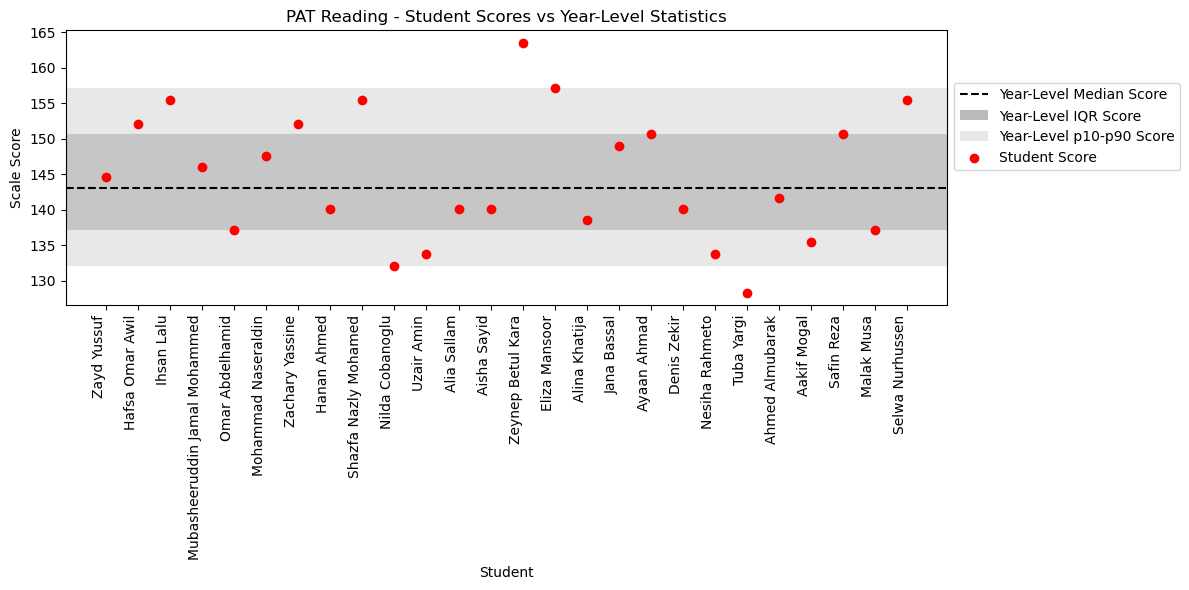

In [ ]:
# student_vs_year_score(df1 = students_maths_match, df2 = class_test,
#                       yearlevel_scores= 'Scale', student_scores= 'Scale',
#                       student_names= 'StudentNameExternal',
#                       title = 'PAT Maths - Student Scores vs Year-Level Statistics')

student_vs_year_score(df1 = students_reading_match, df2 = class_test_reading,
                      yearlevel_scores= 'Scale', student_scores= 'Scale',
                      student_names= 'StudentNameExternal',
                      title = 'PAT Reading - Student Scores vs Year-Level Statistics')

In [ ]:
# # ---------------------------------------------------------------
# # STUDENT SCALE SCORE PERFORMANCE RELATIVE TO WHOLE YEAR-LEVEL
# # ---------------------------------------------------------------

# # Calculating medians and IQRs for the year-level
# median = np.median(students_maths_match["Scale"])
# q1 = np.percentile(students_maths_match["Scale"], 25)
# q3 = np.percentile(students_maths_match["Scale"], 75)
# #iqr = q3 - q1

# # Finding 10th and 90th percentiles
# p10 = np.percentile(students_maths_match["Scale"], 10)
# p90 = np.percentile(students_maths_match["Scale"], 90)


In [ ]:
# # Making figure and axes
# fig, ax = plt.subplots(figsize = (12,6))

# # Plot median line
# median_line = ax.axhline(y = median, color = 'black', linestyle = '--', label = "Year-Level Median Score")
# # # Plot Quartiles
# # ax.axhline(y = q1, color = 'blue', linestyle = '--', label = "Year-Level Q1 Score")
# # ax.axhline(y = q3, color = 'blue', linestyle = '--', label = "Year-Level Q3 Score")
# # Plot IQR range (as shaded box)
# iqr_span = ax.axhspan(q1, q3, facecolor='darkgrey', alpha=0.8, label="Year-Level IQR Score")
# # Plot 10th and 90th percentiles
# p10p90_span = ax.axhspan(p10, p90, facecolor='lightgrey', alpha=0.5, label="Year-Level p10-p90 Score")

# # For each student in the class, plot them on the x-axis and make their names the axis ticks
# ax.scatter(
#     x = range(len(class_test)),
#     y = class_test['Scale'],
#     color = 'red',
#     label='Student Score',
#     zorder = 5
# )
# # Setting x-axis ticks and labels
# ax.set_xticks(range(len(class_test)))
# ax.set_xticklabels(class_test['StudentNameExternal'], rotation=90, ha='right')

# # Add labels and title
# ax.set_ylabel('Scale Score')
# ax.set_xlabel('Student')
# ax.set_title('PAT Maths - Student Scores vs Year-Level Statistics')

# # Optional: add legend
# ax.legend(
#     loc = "center left",
#     bbox_to_anchor = (1.0, 0.65), # move to right
#     frameon = True # add frame
# )

# plt.tight_layout()
# plt.show()


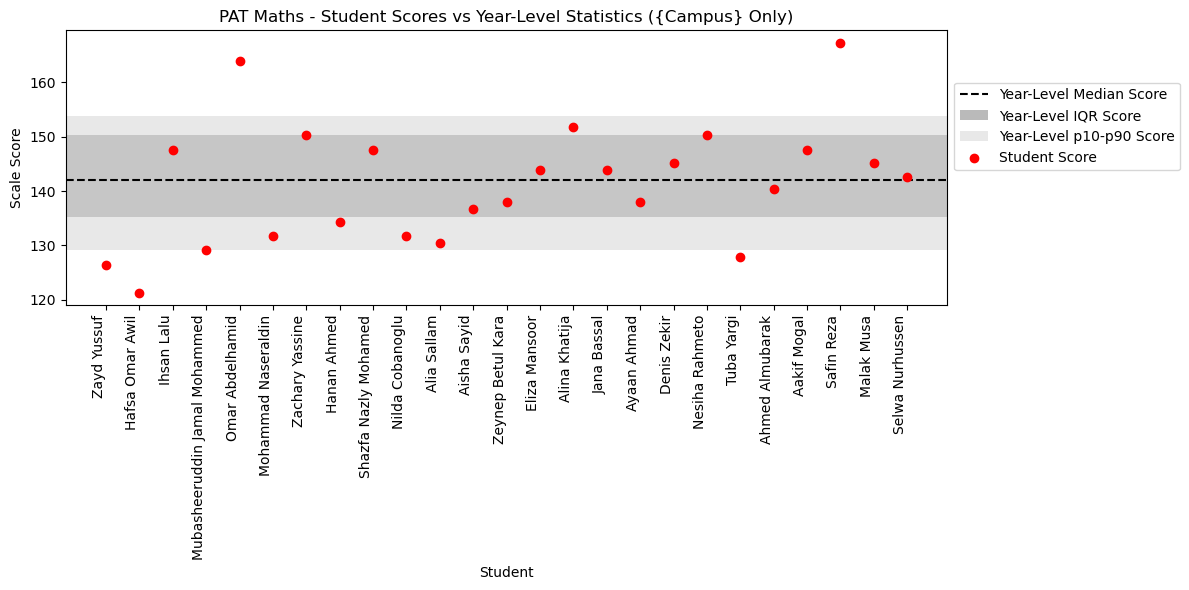

In [ ]:
# # ---------------------------------------------------------------
# # STUDENT SCALE SCORE PERFORMANCE RELATIVE TO CAMPUS
# # ---------------------------------------------------------------

# get campus
campuses = class_test['Campus'].unique() # Getting all unique campuses in df
# Filter the year-level dataframe to include campus class is in
campus_set_maths = students_maths_match[students_maths_match['Campus'].isin(campuses)]


# Applying function
student_vs_year_score(df1 = campus_set_maths, df2 = class_test,
                      yearlevel_scores='Scale', student_scores= 'Scale',
                      student_names= 'StudentNameExternal',
                      title = 'PAT Maths - Student Scores vs Year-Level Statistics ({Campus} Only)')


### Percentile Bell Curve

In [ ]:
# # Making a bell curve based on Aussie norms and plotting students relative to it
# # Data obtained from: https://www.acer.org/in/pat/pat-insights/updated-australian-norms & https://schoolsupport.acer.org/hc/en-au/articles/11231044555279-Norms-and-reference-groups 

# mean = 137.1
# std = 12.4

# # Calculating percentiles
# # Generating range of values
# x = np.linspace(mean-4*std, mean+4*std, 2500) # get the lower, upper bounds, and a range of values between the bounds
# y = norm(loc=mean, scale=std).pdf(x) # calculate the probability density function for each x-value (gives bell shape) based on mean and std

# # Plotting bell curve
# plt.plot(x, y, 
#          color="blue")
# plt.axvline(mean, ls = "--", color = "lightgrey")
# plt.show()

In [ ]:
# Generates student scores on a bell curve
def score_bellcurve(dataframe, mean, std, student_scale_col = 'Scale',
                    title = ""): 
                    #mean = 137.1, std = 12.4):
    """
    Generates a bellcurve based on Australian norms calulated by ACER.
    Plots individual student scores on the curve.

    Parameters:
    - dataframe: the dataframe containing the students and their scale score for a class
    - student_scale_col: the column in dataframe with the student scale scores
    - mean: the nation-wide mean calculated by ACER
    - std: nation-wide standard deviation
    """
    # Finding percentiles 
    # Generating range of values
    x = np.linspace(mean-4*std, mean+4*std, 2500) # get the lower, upper bounds, and a range of values between the bounds
    y = norm(loc=mean, scale=std).pdf(x) # calculate the probability density function for each x-value (gives bell shape) based on mean and std
    # scaling the height of the bell curve
    y = y * 0.5

    # Turning scale column to numeric so we can drop NaNs
    dataframe[student_scale_col] = pd.to_numeric(dataframe[student_scale_col], errors='coerce')
    # Getting student scales and names
    scores = dataframe[student_scale_col].dropna().to_numpy() # drops NaN values
    names = dataframe.loc[dataframe[student_scale_col].notna(), 'StudentNameExternal'].tolist() # gets student names as list

    # Calulating probability density function for the curve
    score_y = norm(loc=mean, scale=std).pdf(scores) * 0.5 # also scale points to ft curve

    # Preparing plot area
    plt.figure(figsize=(12, 9))
    
    # Plot bell curve
    plt.plot(x, y, color="blue", label="Bell Curve")
    plt.axvline(mean, ls="--", color="lightgrey") # Plotting mean line

    # Plot student scatter
    plt.scatter(scores, score_y, color="red", zorder=5)

    # Getting names as text
    texts = []
    for name, sx, sy in zip(names, scores, score_y):
        texts.append(plt.text(sx, sy, name, ha='center', fontsize=9))
    # Adjusting texts - preventing overlap
    with warnings.catch_warnings(): # gets warnings as they come up
        warnings.simplefilter("ignore") # Does not print warning
        with contextlib.redirect_stdout(None): # Does not print statements
            adjust_text(
                texts,
                only_move={'points':'y', 'texts':'y'},  # move labels vertically only
                expand_text=(1.1, 1.2),  # control spacing between labels
                force_text=0.45, # strength of repulsion
                #arrowprops=None # no arrows
                arrowprops=dict(arrowstyle='-', color='grey', lw=0.5, shrinkA=8) # add arrows. shrinkA controls how far away the arrow starts from the text. bigger value = further
            )

    # removing y-axis ticks and label
    plt.gca().set_yticks([])
    plt.ylabel(None)

    # Optional - place student names on x-axis
    #plt.xticks(scores, names, rotation=45)

    # Formatting
    plt.xlabel("Nation-wide Scale Scores")
    plt.title(title)
    plt.tight_layout()
    plt.show()

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


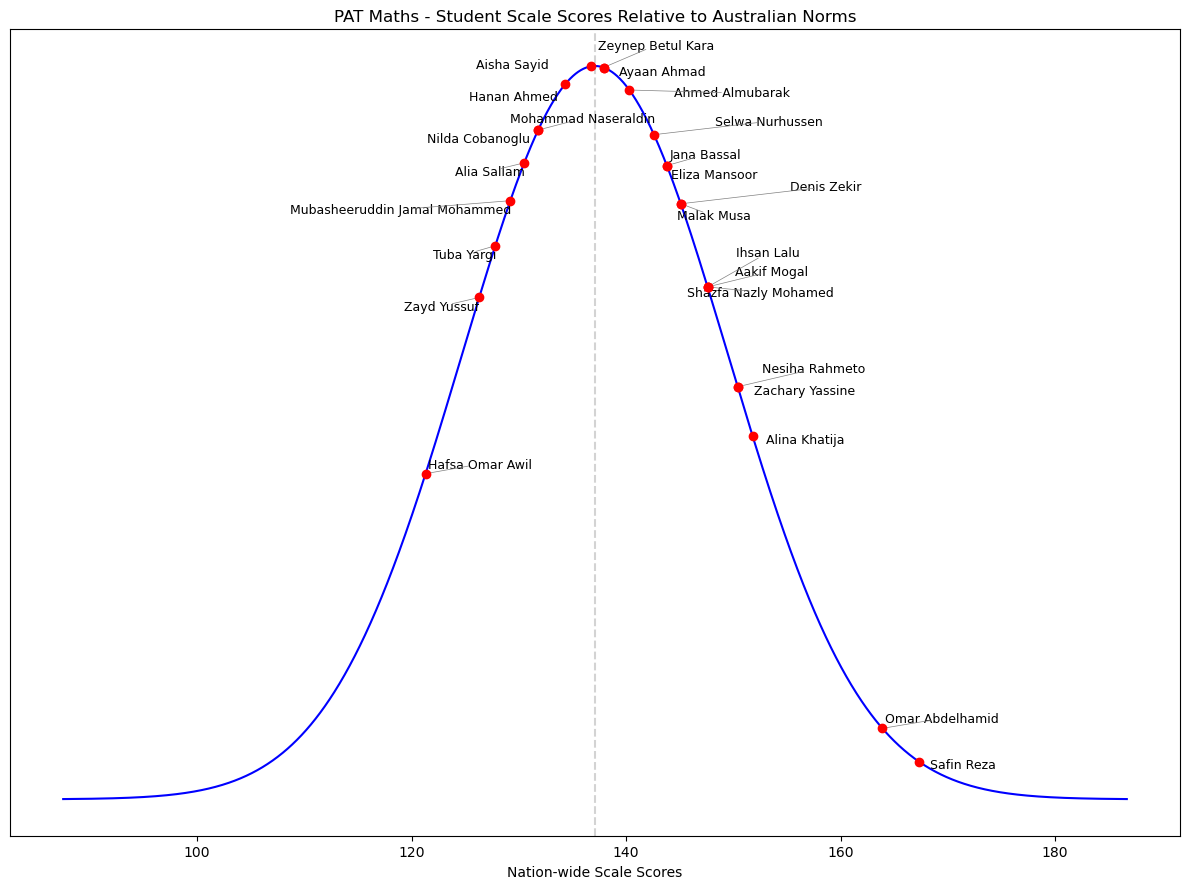

In [ ]:
score_bellcurve(class_test, mean=137.1, std=12.4, student_scale_col='Scale',
                title = "PAT Maths - Student Scale Scores Relative to Australian Norms")

In [ ]:

# # Calculating percentiles
# # Generating range of values
# x = np.linspace(mean-4*std, mean+4*std, 2500) # get the lower, upper bounds, and a range of values between the bounds
# y = norm(loc=mean, scale=std).pdf(x) # calculate the probability density function for each x-value (gives bell shape) based on mean and std


# class_test['Scale'] = pd.to_numeric(class_test['Scale'], errors='coerce')

# scores = class_test['Scale'].dropna().to_numpy()
# names = class_test.loc[class_test['Scale'].notna(), 'StudentNameExternal'].tolist()

# # -----------------------------
# # Plot
# # -----------------------------
# plt.figure(figsize=(12, 8.5))

# # Bell curve
# plt.plot(x, y, color="blue", label="Bell Curve")

# # Mean line
# plt.axvline(mean, ls="--", color="lightgrey")

# # Student points
# plt.scatter(scores + np.random.normal(0, 0.3, len(scores)), score_y, color="red", zorder=5)

# # Create list of text objects
# texts = []
# for name, sx, sy in zip(names, scores, score_y):
#     texts.append(plt.text(sx, sy, name, ha='center', fontsize=9))

# # Adjust text to prevent overlap
# adjust_text(
#     texts,
#     only_move={'points':'y', 'texts':'y'},  # move labels vertically only
#     expand_text=(1.05, 1.2),                 # control spacing between labels
#     force_text=0.45,                          # strength of repulsion
#     #arrowprops=None                           # no arrows
#     arrowprops=dict(arrowstyle='-', color='grey', lw=0.5, shrinkA=5) # add arrows. shrinkA controls how far away the arrow starts from the text
# )

# # remove y-axis
# plt.gca().set_yticks([])

# # Custom ticks: place names below their scores
# #plt.xticks(scores, names, rotation=45)

# plt.xlabel("Nation-wide Scale Scores")
# plt.ylabel(None)
# plt.title("PAT Maths - Student Scale Scores Relative to Australian Norms")
# plt.tight_layout()
# plt.show()


### Cumulative Grades

In [ ]:
# Getting subset for class
# Converting ID columns to the same type
student_CG['Student ID'] = student_CG['Student ID'].astype(str)
class_test['ID'] = class_test['ID'].astype(str)

class_CG = student_CG[student_CG['Student ID'].isin(class_test['ID'])]

# Subsetting for year level
year = 10
year_CG = student_CG[student_CG['Year Level'] == year]

# Plotting
# Number of students with a specific grade (year-level numbers in the background)
def plot_CG(year_level_df, class_df, year_CG_col = 'Cumulative Grade', class_CG_col = 'Cumulative Grade',
            grade_ord = None,
            plot_title = ""):
    
    """
    Makes box plot displaying the number of students with each cumulative grade in the class.

    Parameters:
    - year_level_df: dataframe of whole year level
    - class_df: dataframe of class
    - year_CG_col: column name of cumulative grades (from year level dataframe)
    - class_CG_col: column name of cumulative grades (from class dataframe)

    """
    
    # Setting default grade order
    if grade_ord is None:
        grade_ord = ["A+", "A", "B+", "B", "C+", "C", "D+", "D", "E+", "E"]

    # Counting number of students
    class_counts = (
        class_df[class_CG_col]
        .value_counts()
        .reindex(grade_ord, fill_value=0)
        .reset_index()
    )
    class_counts.columns = ["Grade", "Count"]

    year_counts = (
        year_level_df[year_CG_col]
        .value_counts()
        .reindex(grade_ord, fill_value=0)
        .reset_index()
    )
    year_counts.columns = ["Grade", "Count"]

    # Set plot area
    fig, ax = plt.subplots(figsize = (18,9))

    # Drawing bars
    sns.barplot(
        data = class_counts,
        x = "Grade",
        y="Count",
        color="#FB6542",  # orange
        width=0.6,
        ax=ax,
        label="Class"
    )
    
    # # Line plot for class
    # sns.lineplot(
    #     data=year_counts,
    #     x="Grade",
    #     y="Count",
    #     color="#375E97",  # dark blue
    #     linewidth=2.5,
    #     marker="o",
    #     ax=ax,
    #     label="Year level"
    # )

    # Set axes
    ax.set_xlabel("Cumulative Grade")
    ax.set_ylabel("Number of Students")
    ax.set_title(plot_title)

    # max_count = max(class_counts["Count"].max(), year_counts["Count"].max()) # Setting dynamic maximum limit of y-axis
    # ax.set_ylim(0, max_count + 2)
    ax.set_ylim(0, class_counts["Count"].max() + 1)

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
    
    # Plotting legend boxes
    # Performance legend (Year vs Class)
    perf_legend = ax.legend(
        title = "Performance",
        loc = "center left",
        bbox_to_anchor = (1.0, 0.65), # Move to the right
        frameon = True # Visible box
    )
    ax.add_artist(perf_legend)
    
    # Set titles
    ax.set_title(plot_title)

    plt.tight_layout()
    plt.show()

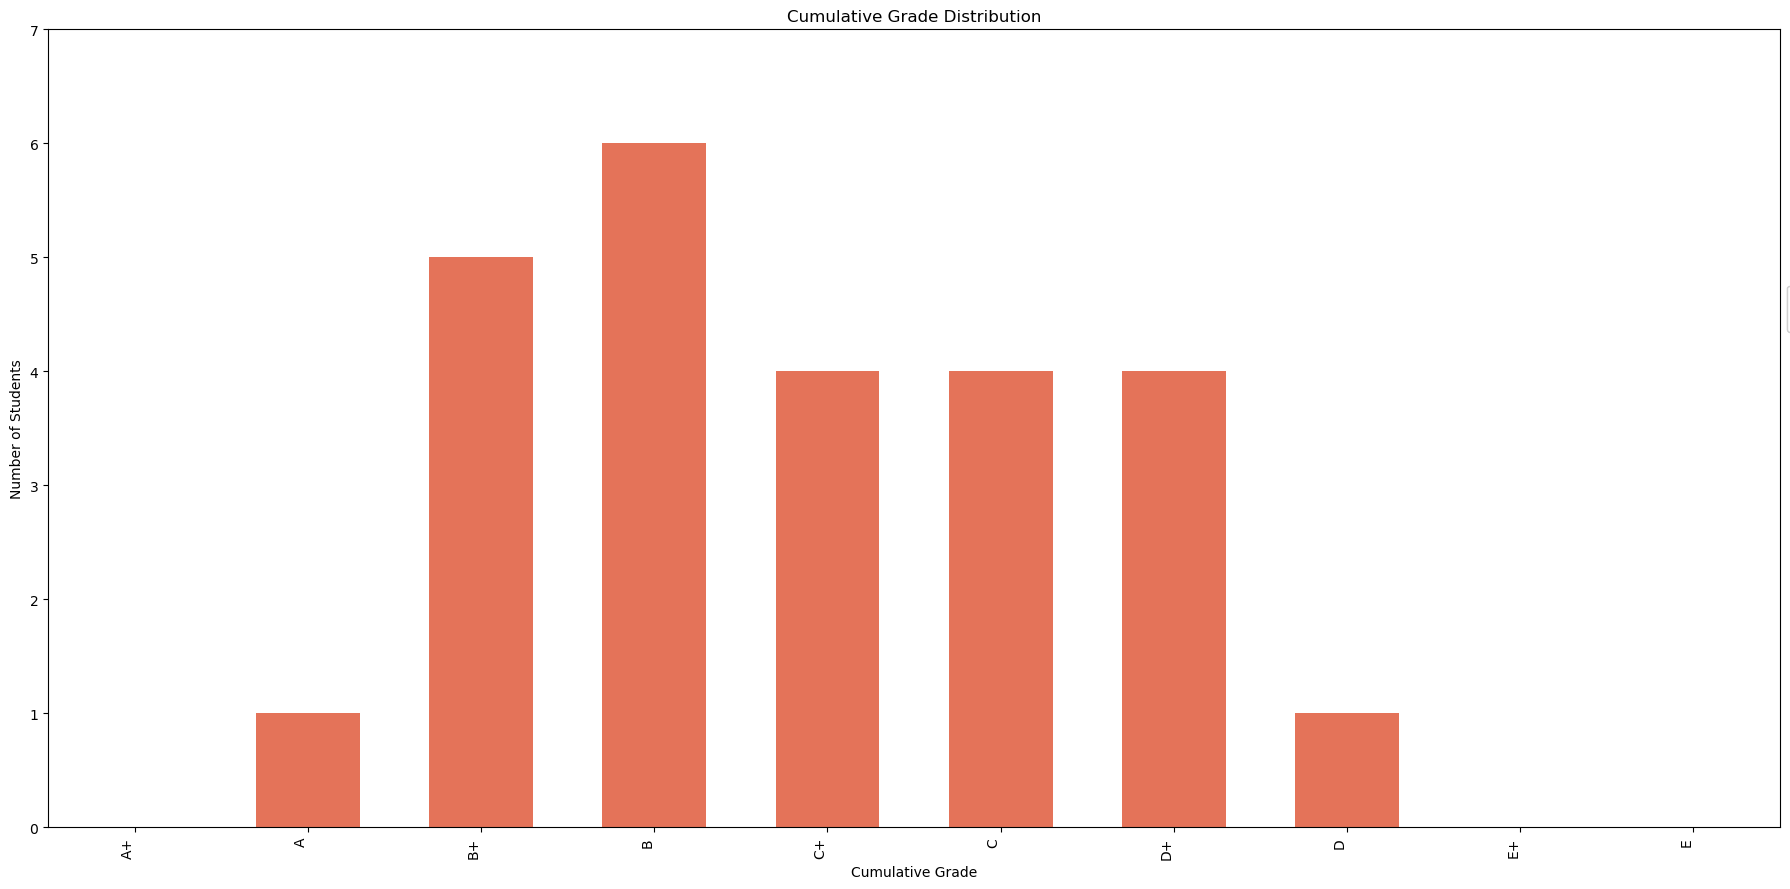

In [ ]:
# Academically weak: D and below
# Academically strong: B+ and above

grade_ord_year = ["A+", "A", "B+", "B", "C+", "C", "D+", "D", "E+", "E"]

plot_CG(year_CG, class_CG, 
        year_CG_col = 'Cumulative Grade', class_CG_col = 'Cumulative Grade',
        grade_ord = grade_ord_year, 
        plot_title = "Cumulative Grade Distribution")

#### Scatter Plot

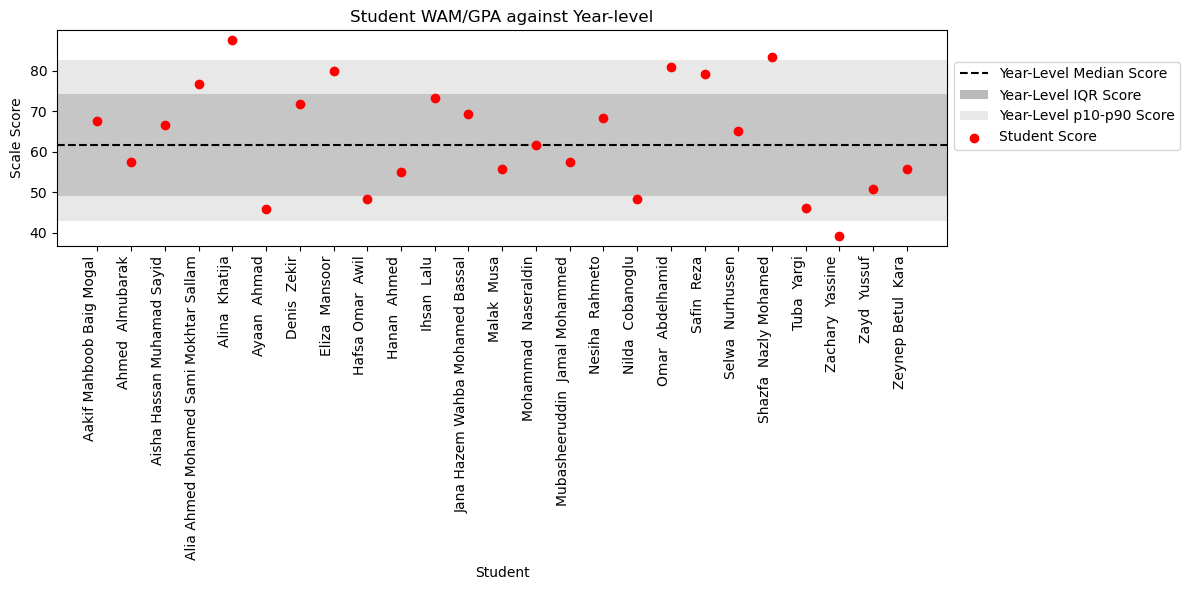

In [ ]:
# Function
student_vs_year_score(df1 = year_CG, df2 = class_CG,
                      yearlevel_scores = 'WAMorGPA', student_scores = 'WAMorGPA',
                      student_names= 'Student Name',
                      title = 'Student WAM/GPA against Year-level')

## Finalising Dataframe

In [ ]:
# getting columns we want to print
cols_to_print = ['ID', 'StudentNameExternal', 'StudentYearLevel',
                'Score', 'Scale', 'Percentile']
df_maths_print = class_test[cols_to_print].copy()
df_reading_print = class_test[cols_to_print].copy()


In [ ]:
# # get dataframe required
# cols_to_drop = ['ClassCode', 'ClassCampus', 'ClassDescription', 'name_clean', 
#                 'Full Name', 'Full Name (Synergetic)', 'Username', 'ID_student', 
#                 'DOB', 'Gender', 'Completed', 'Year level (current)', 'Active tags']

# df_for_print = class_test.drop(columns = cols_to_drop)

# # Reading
# df_reading_drop = class_test_reading.drop(columns = cols_to_drop)

In [ ]:
# # Add new row at the top

# def insert_header_row_auto(df_main, df_source, source_row_idx=10,
#                            main_fixed_values=None,
#                            source_start_col_idx=13,  # start from correct column index
#                            main_question_start_col=None):
#     """
#     Insert a dynamic header row at the top of df_main.
#     - main_fixed_values: dict of fixed values (e.g., {'Year level (current)': 'Correct Answers'})
#     - source_start_col_idx: index in df_source to start copying question values
#     """

#     new_row = {col: None for col in df_main.columns}

#     # Fill fixed values
#     if main_fixed_values:
#         for col, val in main_fixed_values.items():
#             if col in new_row:
#                 new_row[col] = val

#     # Detect question columns in df_main
#     if main_question_start_col is None:
#         question_cols = [c for c in df_main.columns if str(c).isdigit()]
#     else:
#         cols = df_main.columns.tolist()
#         start_idx = cols.index(main_question_start_col)
#         question_cols = [c for c in cols[start_idx:] if str(c).isdigit()]

#     # Select corresponding columns from df_source starting at source_start_col_idx
#     source_cols = df_source.columns.tolist()
#     source_question_cols = source_cols[source_start_col_idx:source_start_col_idx + len(question_cols)]

#     # Copy values into new_row
#     for main_col, source_col in zip(question_cols, source_question_cols):
#         new_row[main_col] = df_source.iloc[source_row_idx][source_col]

#     # Insert row at top
#     df_new = pd.concat([pd.DataFrame([new_row]), df_main], ignore_index=True)
#     return df_new


In [ ]:
# df1_updated = insert_header_row_auto(
#     df_main=df_for_print,
#     df_source=data_maths,
#     source_row_idx=10,
#     main_fixed_values={'StudentYearLevel': 'Correct Answers'},
#     source_start_col_idx=13,  # start from column 13 in df_source
# )

# # Reading
# df_final_reading = insert_header_row_auto(
#     df_main=df_reading_drop,
#     df_source=data_reading,
#     source_row_idx=10,
#     main_fixed_values={'StudentYearLevel': 'Correct Answers'},
#     source_start_col_idx=13,
# )

In [ ]:
# Renaming
df_maths_print.rename(columns={
    'ID': 'Student ID',
    'StudentNameExternal': 'Student Name',
    'StudentYearLevel': 'Year Level',
    'Score': 'PAT Raw Score',
    'Scale': 'PAT Scaled Score',
    'Percentile': 'PAT Percentile'}, 
    inplace=True
)

df_reading_print.rename(columns={
    'ID': 'Student ID',
    'StudentNameExternal': 'Student Name',
    'StudentYearLevel': 'Year Level',
    'Score': 'PAT Raw Score',
    'Scale': 'PAT Scaled Score',
    'Percentile': 'PAT Percentile'}, 
    inplace=True
)

In [ ]:
# Adding columns
df_maths_print['WAM or GPA'] = df_maths_print['Student ID'].map(
    class_CG.set_index('Student ID')['WAMorGPA']
    )
df_maths_print['Cumulative Grade'] = df_maths_print['Student ID'].map(
    class_CG.set_index('Student ID')['Cumulative Grade']
    )

# df_maths_print = pd.merge(
#     df_maths_print,
#     class_CG[['Student ID', 'WAMorGPA', 'Cumulative Grade']],
#     on='Student ID',
#     how='left'
# )

#### Significance Testing

As we are only assessing the difference in individual student scale scores relative to the ACER norms, we are unable to perform a t-test. Rather, we will find the z-score of students relative to the norm.
Please note that because this uses the ACER-defined norms rather than raw data, this test is also a close estimate for the student score significance. Our main assumption is that student scores are approximately normally distributed so the mean is approximately equal to the median of the dataset.

An alternative method of assessing a student's position relative to the national norm is the percentiles provided by ACER.

In [ ]:
import scipy.stats as stats

# Flag (if z-score is +/- 1.5 then high/low within the school)
def find_zscore(dataframe, scalescore_col, mean, std, threshold,
                flag_col_name = 'Maths Achievement',
                high_achieve_tag = 'High maths achiever',
                under_achieve_tag = 'Under-acheiver (Maths)',
                typical_tag = 'Typical maths achiever'):
    """
    Finds the z-score for each student's PAT scaled score.

    Parameters:
    - dataframe: the dataframe with the student scores
    - scalescore_col: column with the student scale scores
    - mean: population mean/median (defined by ACER or school/campus mean)
    - std: population standard deviation (defined by ACER or school/campus mean)
    - threshold: threshold to flag if student is high or low acheiving
    """

    # find z-score (finds number of std devs away from mean)
    dataframe['Z-Score'] = (dataframe[scalescore_col] - mean)/ std

    # Find p-values
    # p = 2 * (1 - stats.norm.cdf(abs(z)))

    # Adding flag column
    dataframe[flag_col_name] = np.where(
        dataframe['Z-Score'] >= threshold, high_achieve_tag,
        np.where(
            dataframe['Z-Score'] <= -threshold, under_achieve_tag,
            typical_tag
        )
    )

    return dataframe


In [ ]:
# Running
find_zscore(df_maths_print,
            scalescore_col='PAT Scaled Score',
            mean = 137.1, std = 12.4,
            threshold = 1.5)

# # Getting school/campus-wide mean and std dev
# cohort_mean = np.mean(campus_set_maths['Scale'])
# cohort_std = np.std(campus_set_maths['Scale'])


,Student ID,Student Name,Year Level,PAT Raw Score,PAT Scaled Score,PAT Percentile,WAM or GPA,Cumulative Grade,Z-Score,Maths Achievement
83,23783,Zayd Yussuf,10,10,126.3,19,50.8,C,-0.870968,Typical maths achiever
841,34033,Hafsa Omar Awil,10,7,121.3,10,48.3,D+,-1.274194,Typical maths achiever
2397,34312,Ihsan Lalu,10,27,147.6,80,73.3,B,0.846774,Typical maths achiever
3977,29151,Mubasheeruddin Jamal Mohammed,10,12,129.2,26,57.5,C+,-0.637097,Typical maths achiever
5114,35829,Omar Abdelhamid,10,36,163.9,98,80.8,B+,2.161290,High maths achiever
6642,21950,Mohammad Naseraldin,10,14,131.8,33,61.7,C+,-0.427419,Typical maths achiever
6650,29833,Zachary Yassine,10,29,150.4,85,39.2,D,1.072581,Typical maths achiever
9910,30018,Hanan Ahmed,10,16,134.3,41,55.0,C,-0.225806,Typical maths achiever
10900,25446,Shazfa Nazly Mohamed,10,27,147.6,80,83.3,B+,0.846774,Typical maths achiever
11137,31023,Nilda Cobanoglu,10,14,131.8,33,48.3,D+,-0.427419,Typical maths achiever


In [ ]:
# # Check distribution of scores
# plt.hist(students_maths_match['Scale'], bins=20)
# plt.title("Distribution of scaled scores")
# plt.xlabel("Scaled score")
# plt.ylabel("Number of students")
# plt.show()


#### Clustering

To visualise the academic profile similarity of students, we will be using the PAT Maths and Reading scale scores as well as the student's WAM/GPA. We use these as they are all numeric measures of performance and allow clustering algorithms to accurately identify the differences in acheivement. Comparatively, cumulative grades are ordinal and much of the nuance between scores will be missing. This makes them less suitable for identifying similarity patterns in the dataset.

Before clustering, we need to standardise our features. This ensures that differences in the scale between the features do not disproportionally affect the clustering results, thus allowing each measure to contribute to the similarity assessment equally.

In terms of clustering, k-means++ will be used as the main clustering algorithm. Compared to other algorithm, k-means++ is easy to scale for larger datasets, and is computationally efficient. It is an improvement on the original k-means, allowing for improved centroid initialisation and more stable, interpretable clusters. Results are also more interpretable, as each student is assigned to a single cluster, making clusters easier to summarise. These properties make it well suited for continuous, standardised achievement measures such as PAT scores and GPA, while producing reproducible and interpretable clusters suitable for educational analysis.

In [ ]:
# Getting dataframe together
clustering_df = df_maths_print.merge(df_reading_print, how = 'left', on = ['Student ID', 'Student Name'], suffixes = ('_Maths', '_Reading'))
clustering_df.drop(columns=['Year Level_Reading', #'Z-Score_Maths', 'Z-Score_Reading',
                            'Maths Achievement'], inplace = True) #, 'Reading Achievement'], inplace=True)

In [ ]:
# Standardising
from sklearn.preprocessing import StandardScaler

features = ['PAT Scaled Score_Maths', 'PAT Scaled Score_Reading', 'WAM or GPA']
X = clustering_df[features]

scaler = StandardScaler() # Converts each feature to have a mean of 0 and std = 1
X_scaled = scaler.fit_transform(X)


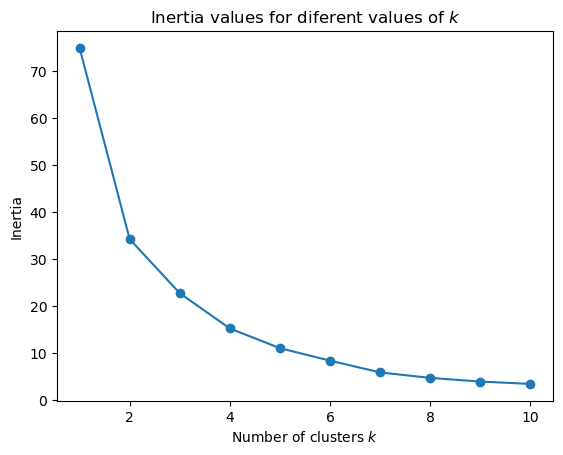

In [ ]:
# Finding optimal number of clusters
from sklearn.cluster import KMeans
# Supressing warning - note the memory leak may affect the larger job
import warnings
warnings.filterwarnings('ignore')

# k-means clustering
def kmeans_inertia(k, data):
    kmeans = KMeans(
        n_clusters=k, max_iter=1000, n_init=100,
        random_state=42,  # use this to get reproducible results
    ).fit(data).inertia_
    return kmeans

inertia_values = [kmeans_inertia(k, X_scaled) for k in range(1, 11)]

plt.plot(range(1, 11), inertia_values, "o-")
plt.title("Inertia values for diferent values of $ k $")
plt.xlabel("Number of clusters $ k $")
plt.ylabel("Inertia")
plt.show()

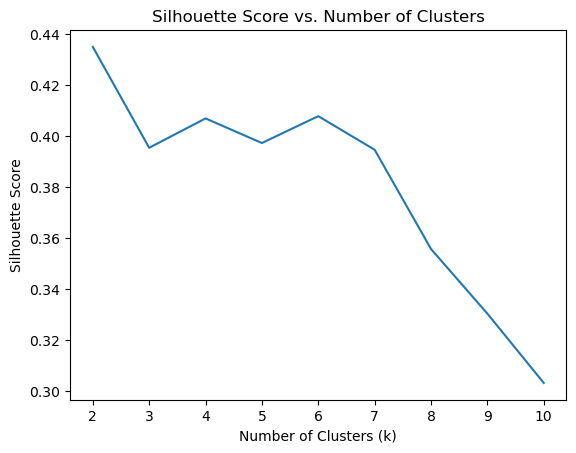

In [ ]:
from sklearn.metrics import silhouette_score

def kmeans_clustering(k, data):
    kmeans = KMeans(
        n_clusters=k, max_iter=1000, n_init=100,
        random_state=42,  # use this to get reproducible results
    ).fit(data)
    return kmeans

# Determine optimal k
silhouette_scores = []
for k in range(2, 11):
    kmeans = kmeans_clustering(k, X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Measures how well each point fits in its cluster vs the nearest other cluster.
# Score ranges from -1 to 1:
# 1 → very well clustered
# 0 → on the boundary
# Negative → possibly misassigned

In [ ]:
# Sum_of_squared_distances = []
# K = range(1,15)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(X_scaled)
#     Sum_of_squared_distances.append(km.inertia_)

# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [ ]:
# Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

clustering_df['Cluster'] = clusters


In [ ]:
# Flagging student profiles
def label_kmeans_clusters(df, cluster_col="Cluster", scaled_features=None,
    labels=("Under-performer", "Typical performer", "High performer"),
    output_col="Performance Flag"
):
    """
    Dynamically labels K-means clusters based on average performance
    in standardised feature space.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing cluster assignments.
    cluster_col : str
        Column name containing K-means cluster labels.
    scaled_features : list of str
        Features used in K-means AFTER standardisation.
        (e.g. ['PAT Scaled Score_Maths', 'PAT Scaled Score_Reading', 'WAM or GPA'])
    labels : tuple
        Ordered labels from lowest to highest performance.
    output_col : str
        Name of the output flag column.

    Returns
    -------
    pd.DataFrame
        DataFrame with performance flag column added.
    """

    if scaled_features is None:
        raise ValueError("You must provide the features used for K-means.")

    # Re-standardise to match K-means geometry
    cluster_space = (
        df[scaled_features] - df[scaled_features].mean()
    ) / df[scaled_features].std()

    # Composite performance index (per student)
    df["_cluster_index"] = cluster_space.mean(axis=1)

    # Rank clusters by average index
    cluster_perf = (
        df.groupby(cluster_col)["_cluster_index"]
          .mean()
          .sort_values()
    )

    # Map clusters to labels dynamically
    label_map = {
        cluster: labels[i]
        for i, cluster in enumerate(cluster_perf.index)
    }

    # Apply labels
    df[output_col] = df[cluster_col].map(label_map)

    # Cleanup
    df.drop(columns="_cluster_index", inplace=True)

    return df

In [ ]:
features = [
    "PAT Scaled Score_Maths",
    "PAT Scaled Score_Reading",
    "WAM or GPA"
]

clustering_df = label_kmeans_clusters(
    df=clustering_df,
    cluster_col="Cluster",
    scaled_features=features
)

In [ ]:
# Visualising - need to use PCA instead of scatter as we have 3+ features
# clustering_df.groupby('Cluster')[features].mean()

# plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters)
# plt.xlabel('Maths (scaled)')
# plt.ylabel('Reading (scaled)')
# plt.show()

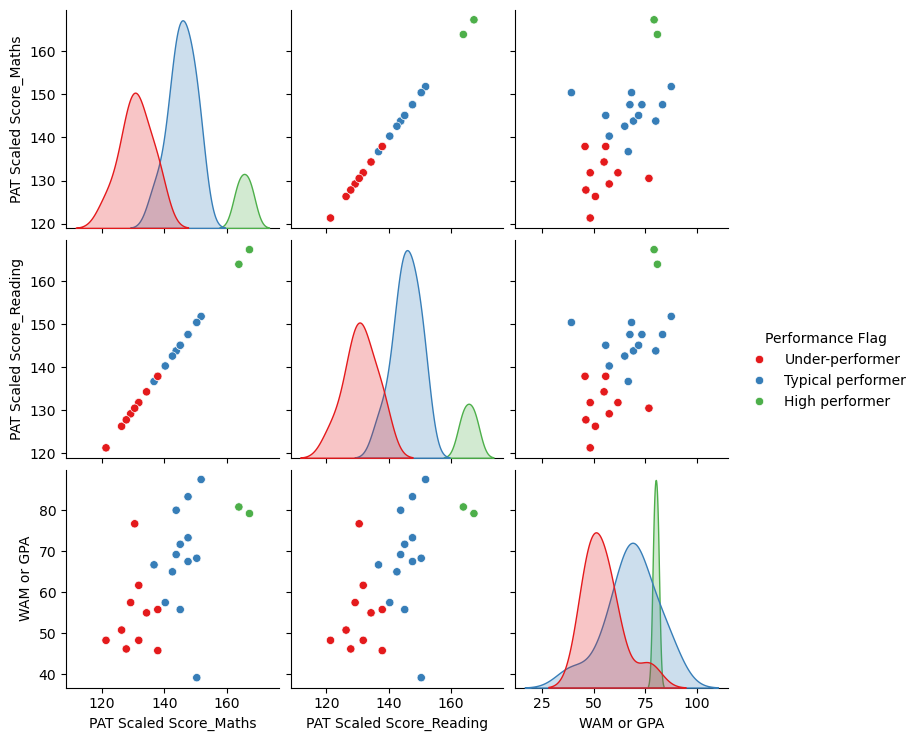

In [ ]:
# sns.pairplot(clustering_df, 
#              vars=['PAT Scaled Score_Maths', 'PAT Scaled Score_Reading', 'WAM or GPA'], 
#              hue='Cluster', 
#              palette='Set1',
#              diag_kind = 'kde')
# plt.show()

# Unique performance flags
flags = clustering_df['Performance Flag'].unique()
palette = sns.color_palette("Set1", n_colors=len(flags))
flag_color_map = {flag: color for flag, color in zip(flags, palette)}

sns.pairplot(
    clustering_df,
    vars=['PAT Scaled Score_Maths', 'PAT Scaled Score_Reading', 'WAM or GPA'],
    hue='Performance Flag',
    palette=flag_color_map,
    diag_kind='kde'
)

# Straight diagonal line between PAT Reading and PAT Maths score indicates positive correlation. In terms of PCA, explains with PC1 is roughly an 'overall acheivement' component as both test scores move together.
# Scatter for PAT Scores and WAM/GPA implies weaker correlation. PAT test performance does not always predict WAM/GPA and vice versa. Consistent with PC2 where there is a noted difference between GPA/WAM scores and PAT

# Pairplots of PAT Maths, PAT Reading, and WAM/GPA, colored by cluster, show that Cluster 0 represents students with strong performance across tests and GPA, while Cluster 1 includes students strong on PAT tests but with lower GPA. 
# Cluster 2 contains students with more average performance. 
# The pairplots also reveal correlations between Maths and Reading scores, consistent with the PCA results showing overall achievement captured by PC1, while differences between PAT and GPA are reflected in PC2.

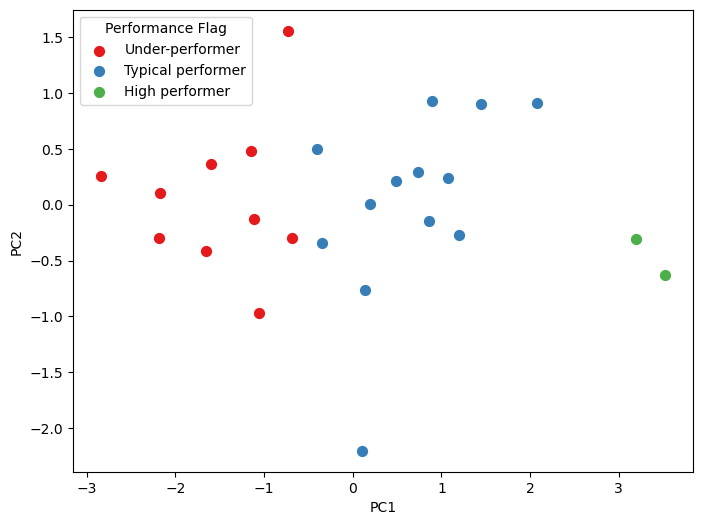

In [ ]:
from sklearn.decomposition import PCA

# # Assuming X_scaled is your standardized feature matrix
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(8,6))

# # Map cluster numbers to colors and labels
# clusters = clustering_df['Cluster'].unique()
# colors = plt.cm.Set1(range(len(clusters)))  # automatically picks colors

# for cluster, color in zip(clusters, colors):
#     mask = clustering_df['Cluster'] == cluster
#     plt.scatter(
#         X_pca[mask, 0], X_pca[mask, 1],
#         s=50,
#         c=[color],
#         label=f'Cluster {cluster}'
#     )


# #plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering_df['Cluster'], cmap='Set1', s=50)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('Cluster Visualization (PCA-reduced)')
# plt.legend(title='Cluster')
# #plt.colorbar(label='Cluster')
# plt.show()

# PCA coordinates
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))

for flag, color in flag_color_map.items():
    mask = clustering_df['Performance Flag'] == flag
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[color],
        label=flag,
        s=50
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('PCA of Students by Performance Flag')
plt.legend(title='Performance Flag')
plt.show()


In [ ]:
loadings = pd.DataFrame(pca.components_, columns=features, index=['PC1','PC2'])
print(loadings)

# # Output:
# PAT Scaled Score_Maths  PAT Scaled Score_Reading  WAM or GPA
# PC1                0.615478                  0.615478    0.492316
# PC2               -0.348120                 -0.348120    0.870417
#^ Above, PC1 captures overall academic achievement across PAT Maths, PAT Reading, and WAM/GPA. PC2 captures contrasts between WAM/GPA and the PAT scaled scores, highlighting students whose performance is stronger in one type of assessment relative to the other.
# Students with high WAM/GPA and relatively low PAT scores will have high PC2 scores
# Students with high scores on all three metrics will have high PC1 scores

# PC1 captures overall academic achievement across Maths, Reading, and GPA, while PC2 captures differences in relative strength between subjects. 
# Clusters of students in PC space represent groups with similar academic profiles. Students within a cluster are more alike in performance than those in other cluster

# NOTE: PCs do not have any inherent meanings and their distances are relative (i.e. how similar/different students are to each other)

     PAT Scaled Score_Maths  PAT Scaled Score_Reading  WAM or GPA
PC1                0.615478                  0.615478    0.492316
PC2               -0.348120                 -0.348120    0.870417


In [ ]:
# cluster_summary = clustering_df.groupby('Cluster')[features].mean()
# print(cluster_summary)

## Individual Students - NOT FOR CLASS TEACHERS

In [ ]:
# For each student, show:
#   i) % correct for each strand
#   ii) box plot showing their scale score performance besides whole school/year level performance

In [ ]:
# # -------------------------------------------------------
# # PERCENTAGE CORRECT FOR EACH STRAND
# # -------------------------------------------------------

# # Correct answers
# correct_ans_maths = data_maths.iloc[10,13:53]
# correct_ans_reading = data_reading.iloc[10,13:48]

# # Filter out students whow have not taken PAT
# df_no_nan = class_test[class_test["Full Name (Synergetic)"].notna()]

# # Loop through class
# for student in df_no_nan["Full Name (Synergetic)"].unique():

#     # Get each student
#     student_ans = df_no_nan[df_no_nan["Full Name (Synergetic)"].str.contains(student)]

#     # Turn to long format
#     student_ans_long = student_ans.iloc[:, np.r_[8,16:56]].reset_index(drop=True).set_index('Full Name (Synergetic)')
# #     student_ans_final = student_ans_long.apply(lambda col: (col == '✓').sum() / col.notna().sum() * 100).reset_index()
# #     student_ans_final.rename(columns = {
# #     'index': 'Question number',
# #     0 : 'Percentage Correct'
# # }, inplace = True)
#     student_ans_final = student_ans_long.reset_index().melt(id_vars='Full Name (Synergetic)', var_name='Question Number', value_name='Student Response')
#     student_ans_final['Correct Response'] = correct_ans_maths # Change this as required!!
#     student_ans_final['Strand'] = q_strands_maths['Strand']
    
#     # For each strand, calculate the percentage correct
#     result = student_ans_final.groupby('Strand', group_keys=False).apply(
#         lambda x: (x['Student Response'] == '✓').mean() * 100, include_groups=False # Calculating % correct. Creates boolen values and 'mean()' is used to find fraction of True values
#         ).reset_index(name='Percentage Correct')

#     #print(result)

# # Plot bar plot
# sns.barplot(
#     result,
#     x = 'Strand',
#     y = 'Percentage Correct'
# )
# plt.title('PAT Maths - Percentage correct per strand for {student}')



In [ ]:
# -------------------------------------------------------
# BOX PLOT OF SCALE SCORE RELATIVE TO WHOLE YEAR LEVEL
# -------------------------------------------------------

# Year-level summary stats
# students_maths_match['Scale'] = pd.to_numeric( 
#     students_maths_match['Scale'], errors='coerce' # Convert to numeric (it is currently strings)
# )

# # Plotting box-plot
# sns.boxplot(
#     students_maths_match,
#     y = "Scale"
# )

# # Plotting student-specific scale score
# plt.scatter(x = 0, y = 149, # change y to be student's scale dynamically
#             color = 'red', 
#             zorder=10, # ensures it is plotted after the boxplot
#             s=100) # dot size

# # Title
# plt.title('PAT Maths - {student}\'s Scale Score Relative to Year Level')



## Generating report